<a href="https://colab.research.google.com/github/jxm020202/Random-Coding-Sessions/blob/main/UWA_DSC_Ultranest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In a Jupyter notebook cell. Import the module we will be exploring
!pip install ultranest


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultranest: filename=ultranest-4.2.0-cp310-cp310-linux_x86_64.whl size=2216084 sha256=cd179f5b3fe58d8df7facf6f6b529080fd8610aca2f5317cc350495118b5a7a8
  Stored in directory: /root/.cache/pip/wheels/fb/e4/53/a2a95de3cf72b58ce37fad29c4ab0d9a0866fbab45895e203a
Successfully built ultranest


In [ ]:
#Define our sine model that we will be testing
import numpy as np
from numpy import sin, pi

def sine_model(t, B, A, P, t0):
    return A * sin((t / P + t0) * 2 * pi) + B

In [ ]:
#Generate a set of data, with some random noise
#Choose a random seed
np.random.seed(42)

#Set the number of data points we wish to plot
n_data = 20

# time of observations, our x axis, independent variable.
t = np.random.uniform(0, 5, size=n_data)

# measurement values, our y axis, dependent variable.
yerr = 1.0
y = np.random.normal(sine_model(t, A=4.2, P=3, t0=0, B=1.0), yerr)


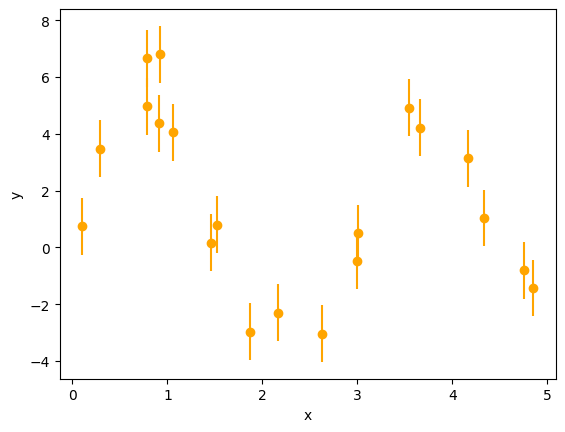

In [ ]:
#Use matplotlib to visualise the data we have just created
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('x')
plt.ylabel('y')
#Ensure that we have error bars giving some wiggle room for our Machine Learning Ultranest
plt.errorbar(x=t, y=y, yerr=yerr,
             marker='o', ls=' ', color='orange');

In [ ]:
#Lets define our parameter spaces, what values do we wish to search through for
# the parameters B A P $t_0$ (taken from our sine model)

parameters = ['B', 'A', 'P', '$t_0$']

def prior_transform(cube):
    # the argument, cube, consists of values from 0 to 1
    # we have to convert them to physical scales

    params = cube.copy()
    # let background level go from -10 to +10
    params[0] = cube[0] * 20 - 10
    # let amplitude go from 0.01 to 100
    params[1] = 10**(cube[1] * 4 - 2)
    # let period go from 0.3 to 30
    params[2] = 10**(cube[2] * 2)
    # let time go from 0 to 1
    params[3] = cube[3]
    return params


In [ ]:
#Define the likelihood, i.e. how we measure the difference between the model and the data. Lets assume gaussian measurement errors.
#This is the compass for our Machine Learning, the reinforcement

def log_likelihood(params):
    # unpack the current parameters:
    B, A, P, t0 = params

    # compute for each x point, where it should lie in y
    y_model = sine_model(t, A=A, B=B, P=P, t0=t0)
    # compute likelihood
    loglike = -0.5 * (((y_model - y) / yerr)**2).sum()

    return loglike


In [ ]:
#Run ultranest's Reactive Nested Sampler
from ultranest import ReactiveNestedSampler

sampler = ReactiveNestedSampler(parameters, log_likelihood, prior_transform,
    wrapped_params=[False, False, False, True],
)
result = sampler.run(min_num_live_points=400, dKL=np.inf, min_ess=100)


DEBUG:ultranest:ReactiveNestedSampler: dims=4+0, resume=False, log_dir=None, backend=hdf5, vectorized=False, nbootstraps=30, ndraw=128..65536


[ultranest] Sampling 400 live points from prior ...


INFO:ultranest:Sampling 400 live points from prior ...
DEBUG:ultranest:run_iter dlogz=0.5, dKL=inf, frac_remain=0.01, Lepsilon=0.0010, min_ess=100
DEBUG:ultranest:max_iters=-1, max_ncalls=-1, max_num_improvement_loops=-1, min_num_live_points=400, cluster_num_live_points=40
DEBUG:ultranest:minimal_widths_sequence: [(-inf, 400.0), (inf, 400.0)]




Mono-modal Volume: ~exp(-3.71) * Expected Volume: exp(0.00) Quality: ok

B    :     -10.0|****************************************************|    +10.0
A    :  +1.0e-02|***********************  ********* ** ***  ****** **| +1.0e+02
P    :      +1.0|************************************ ******* ** ****|   +100.0
$t_0$:    +0.000|****************************************************|   +1.000



DEBUG:ultranest:iteration=0, ncalls=401, regioncalls=40, ndraw=40, logz=-inf, remainder_fraction=100.0000%, Lmin=-63804.49, Lmax=-78.61


DEBUG:ultranest:iteration=40, ncalls=442, regioncalls=1680, ndraw=40, logz=-8404.17, remainder_fraction=100.0000%, Lmin=-8238.47, Lmax=-78.61


DEBUG:ultranest:iteration=80, ncalls=484, regioncalls=3360, ndraw=40, logz=-2563.47, remainder_fraction=100.0000%, Lmin=-2524.35, Lmax=-78.61




Mono-modal Volume: ~exp(-3.82) * Expected Volume: exp(-0.23) Quality: ok

B    :     -10.0|****************************************************|    +10.0
A    :  +1.0e-02|*********** ******         *           *  +7.7e+01  | +1.0e+02
P    :      +1.0|************************************ ***************|   +100.0
$t_0$:    +0.000|****************************************************|   +1.000



DEBUG:ultranest:iteration=90, ncalls=499, regioncalls=3960, ndraw=40, logz=-1937.04, remainder_fraction=100.0000%, Lmin=-1862.02, Lmax=-78.61


DEBUG:ultranest:iteration=120, ncalls=540, regioncalls=5600, ndraw=40, logz=-1321.40, remainder_fraction=100.0000%, Lmin=-1314.42, Lmax=-78.61


DEBUG:ultranest:iteration=153, ncalls=580, regioncalls=7200, ndraw=40, logz=-1143.64, remainder_fraction=100.0000%, Lmin=-1123.17, Lmax=-47.58


DEBUG:ultranest:iteration=160, ncalls=591, regioncalls=7640, ndraw=40, logz=-1099.23, remainder_fraction=100.0000%, Lmin=-1091.71, Lmax=-47.58




Mono-modal Volume: ~exp(-4.25) * Expected Volume: exp(-0.45) Quality: ok

B    :     -10.0|  * ************************************************|    +10.0
A    :  +1.0e-02|****** **** *   **         *  +5.3e+01              | +1.0e+02
P    :      +1.0|************************************ ***************|   +100.0
$t_0$:    +0.000|****************************************************|   +1.000



DEBUG:ultranest:iteration=180, ncalls=619, regioncalls=8760, ndraw=40, logz=-983.27, remainder_fraction=100.0000%, Lmin=-973.07, Lmax=-47.58


DEBUG:ultranest:iteration=200, ncalls=648, regioncalls=9960, ndraw=40, logz=-826.84, remainder_fraction=100.0000%, Lmin=-804.09, Lmax=-47.58


DEBUG:ultranest:iteration=240, ncalls=717, regioncalls=12800, ndraw=40, logz=-684.14, remainder_fraction=100.0000%, Lmin=-672.94, Lmax=-47.58




Mono-modal Volume: ~exp(-4.44) * Expected Volume: exp(-0.67) Quality: ok

B    :     -10.0|  * * ** ****************************************** |    +10.0
A    :  +1.0e-02|*********** *   **  +3.3e+01                        | +1.0e+02
P    :      +1.0|****************************************************|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=270, ncalls=768, regioncalls=14920, ndraw=40, logz=-586.61, remainder_fraction=100.0000%, Lmin=-580.45, Lmax=-47.58


DEBUG:ultranest:iteration=280, ncalls=784, regioncalls=15600, ndraw=40, logz=-568.86, remainder_fraction=100.0000%, Lmin=-558.27, Lmax=-47.58


DEBUG:ultranest:iteration=320, ncalls=866, regioncalls=19080, ndraw=40, logz=-473.43, remainder_fraction=100.0000%, Lmin=-467.04, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90) * Expected Volume: exp(-0.90) Quality: ok

B    :     -10.0|  *   ** **  **********************************  ** |    +10.0
A    :  +1.0e-02|******* ***      *  +3.3e+01                        | +1.0e+02
P    :      +1.0|****************************************************|   +100.0
$t_0$:  +1.0e-06|****************************************************| +1.0e+00



DEBUG:ultranest:iteration=360, ncalls=937, regioncalls=22120, ndraw=40, logz=-409.48, remainder_fraction=100.0000%, Lmin=-402.88, Lmax=-47.58


DEBUG:ultranest:iteration=400, ncalls=1014, regioncalls=25280, ndraw=40, logz=-351.55, remainder_fraction=100.0000%, Lmin=-345.08, Lmax=-47.58


DEBUG:ultranest:iteration=440, ncalls=1098, regioncalls=28960, ndraw=40, logz=-308.73, remainder_fraction=100.0000%, Lmin=-301.50, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-1.12) Quality: ok

B    :     -10.0|  *   **  *   *** *************************  * * ** |    +10.0
A    :  +1.0e-02|******* ***      *  +3.3e+01                        | +1.0e+02
P    :      +1.0|************************************* ****** *******|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=473, ncalls=1174, regioncalls=32200, ndraw=40, logz=-281.99, remainder_fraction=100.0000%, Lmin=-274.95, Lmax=-47.58


DEBUG:ultranest:iteration=480, ncalls=1191, regioncalls=32880, ndraw=40, logz=-275.52, remainder_fraction=100.0000%, Lmin=-268.67, Lmax=-47.58


DEBUG:ultranest:iteration=520, ncalls=1300, regioncalls=37320, ndraw=40, logz=-242.15, remainder_fraction=100.0000%, Lmin=-234.39, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-1.35) Quality: ok

B    :     -10.0|*     ** **  ****************************** ** *    |    +10.0
A    :  +1.0e-02|****** *  *  +2.0e+01                               | +1.0e+02
P    :      +1.0|******************************************** *******|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=554, ncalls=1387, regioncalls=40960, ndraw=40, logz=-224.38, remainder_fraction=100.0000%, Lmin=-216.85, Lmax=-47.58


DEBUG:ultranest:iteration=560, ncalls=1404, regioncalls=41720, ndraw=40, logz=-220.89, remainder_fraction=100.0000%, Lmin=-214.32, Lmax=-47.58


DEBUG:ultranest:iteration=600, ncalls=1526, regioncalls=46920, ndraw=40, logz=-197.93, remainder_fraction=100.0000%, Lmin=-190.78, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-1.57) Quality: ok

B    :     -10.0|   *  **  *  * ** ************************* ** *  * |    +10.0
A    :  +1.0e-02|*******  *  +1.8e+01                                | +1.0e+02
P    :      +1.0|******************************************** ** ****|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=633, ncalls=1628, regioncalls=51400, ndraw=40, logz=-184.69, remainder_fraction=100.0000%, Lmin=-177.19, Lmax=-47.58


DEBUG:ultranest:iteration=640, ncalls=1650, regioncalls=52440, ndraw=40, logz=-181.54, remainder_fraction=100.0000%, Lmin=-174.85, Lmax=-47.58


DEBUG:ultranest:iteration=663, ncalls=1739, regioncalls=56320, ndraw=40, logz=-170.66, remainder_fraction=100.0000%, Lmin=-163.36, Lmax=-47.58


DEBUG:ultranest:iteration=680, ncalls=1823, regioncalls=60200, ndraw=40, logz=-163.35, remainder_fraction=100.0000%, Lmin=-156.94, Lmax=-47.58


DEBUG:ultranest:iteration=717, ncalls=1981, regioncalls=67400, ndraw=40, logz=-153.16, remainder_fraction=100.0000%, Lmin=-146.10, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-1.80) Quality: ok

B    :     -10.0|   *  **  *  *  * *** ********************* ** *  * |    +10.0
A    :  +1.0e-02|*******  *  +1.8e+01                                | +1.0e+02
P    :      +1.0|*********************** ****** ************* ** ****|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=720, ncalls=1995, regioncalls=67960, ndraw=40, logz=-152.08, remainder_fraction=100.0000%, Lmin=-145.18, Lmax=-47.58


DEBUG:ultranest:iteration=732, ncalls=2072, regioncalls=71680, ndraw=40, logz=-148.89, remainder_fraction=100.0000%, Lmin=-142.64, Lmax=-47.58


DEBUG:ultranest:iteration=760, ncalls=2228, regioncalls=78320, ndraw=40, logz=-142.26, remainder_fraction=100.0000%, Lmin=-135.95, Lmax=-47.58


DEBUG:ultranest:iteration=779, ncalls=2323, regioncalls=82520, ndraw=40, logz=-138.93, remainder_fraction=100.0000%, Lmin=-132.50, Lmax=-47.58


DEBUG:ultranest:iteration=798, ncalls=2410, regioncalls=86200, ndraw=40, logz=-135.89, remainder_fraction=100.0000%, Lmin=-129.52, Lmax=-47.58


DEBUG:ultranest:iteration=800, ncalls=2423, regioncalls=86800, ndraw=40, logz=-135.54, remainder_fraction=100.0000%, Lmin=-129.36, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-2.02) Quality: ok

B    :     -10.0|   *  *   *  * ** *** **************** * **  * *  * |    +10.0
A    :  +1.0e-02|***** *  *  +1.8e+01                                | +1.0e+02
P    :      +1.0|****************************** ********* *** ** ****|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=810, ncalls=2473, regioncalls=88920, ndraw=40, logz=-133.96, remainder_fraction=100.0000%, Lmin=-128.01, Lmax=-47.58


DEBUG:ultranest:iteration=821, ncalls=2523, regioncalls=91040, ndraw=40, logz=-132.37, remainder_fraction=100.0000%, Lmin=-125.94, Lmax=-47.58


DEBUG:ultranest:iteration=840, ncalls=2624, regioncalls=95360, ndraw=40, logz=-129.50, remainder_fraction=100.0000%, Lmin=-123.23, Lmax=-47.58


DEBUG:ultranest:iteration=871, ncalls=2802, regioncalls=103240, ndraw=40, logz=-125.52, remainder_fraction=100.0000%, Lmin=-119.79, Lmax=-47.58


DEBUG:ultranest:iteration=880, ncalls=2837, regioncalls=104760, ndraw=40, logz=-124.77, remainder_fraction=100.0000%, Lmin=-118.92, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-2.25) Quality: ok

B    :     -10.0|      *   *  ****  ** **************** *     * *  * |    +10.0
A    :  +1.0e-02|********************* *  ***  **  *  ********   **  | +1.0e+01
P    :      +1.0|**************************************** ****** ** *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=900, ncalls=2934, regioncalls=109080, ndraw=40, logz=-122.28, remainder_fraction=100.0000%, Lmin=-115.85, Lmax=-47.58


DEBUG:ultranest:iteration=918, ncalls=3032, regioncalls=113120, ndraw=40, logz=-120.10, remainder_fraction=100.0000%, Lmin=-114.04, Lmax=-47.58


DEBUG:ultranest:iteration=920, ncalls=3035, regioncalls=113240, ndraw=40, logz=-119.88, remainder_fraction=100.0000%, Lmin=-113.73, Lmax=-47.58


DEBUG:ultranest:iteration=948, ncalls=3203, regioncalls=120640, ndraw=40, logz=-117.10, remainder_fraction=100.0000%, Lmin=-111.35, Lmax=-47.58


DEBUG:ultranest:iteration=960, ncalls=3260, regioncalls=123280, ndraw=40, logz=-116.19, remainder_fraction=100.0000%, Lmin=-110.38, Lmax=-47.58


DEBUG:ultranest:iteration=986, ncalls=3443, regioncalls=131400, ndraw=40, logz=-114.01, remainder_fraction=100.0000%, Lmin=-107.70, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-2.47) Quality: ok

B    :     -10.0|          *  ****  *  **************** *       *  * |    +10.0
A    :  +1.0e-02|********************* *  **   *   *  * **** *   **  | +1.0e+01
P    :      +1.0|**************************************** ****** ** *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=990, ncalls=3460, regioncalls=132280, ndraw=40, logz=-113.57, remainder_fraction=100.0000%, Lmin=-107.31, Lmax=-47.58


DEBUG:ultranest:iteration=1000, ncalls=3532, regioncalls=135560, ndraw=40, logz=-112.47, remainder_fraction=100.0000%, Lmin=-106.23, Lmax=-47.58


DEBUG:ultranest:iteration=1014, ncalls=3688, regioncalls=142400, ndraw=40, logz=-111.27, remainder_fraction=100.0000%, Lmin=-105.19, Lmax=-47.58


DEBUG:ultranest:iteration=1035, ncalls=3871, regioncalls=150160, ndraw=40, logz=-109.77, remainder_fraction=100.0000%, Lmin=-103.82, Lmax=-47.58


DEBUG:ultranest:iteration=1040, ncalls=3930, regioncalls=152560, ndraw=40, logz=-109.41, remainder_fraction=100.0000%, Lmin=-103.42, Lmax=-47.58


DEBUG:ultranest:iteration=1058, ncalls=4154, regioncalls=162160, ndraw=40, logz=-108.11, remainder_fraction=100.0000%, Lmin=-102.11, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-2.70) Quality: ok

B    :     -10.0|          *  ****  * ***************** *          * |    +10.0
A    :  +1.0e-02|********************* ** **   *   ** * ***  *   **  | +1.0e+01
P    :      +1.0|**************************************** ****** ** *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1080, ncalls=4346, regioncalls=170600, ndraw=40, logz=-106.84, remainder_fraction=100.0000%, Lmin=-100.86, Lmax=-47.58


DEBUG:ultranest:iteration=1096, ncalls=4448, regioncalls=175160, ndraw=40, logz=-105.92, remainder_fraction=100.0000%, Lmin=-100.01, Lmax=-47.58


DEBUG:ultranest:iteration=1120, ncalls=4644, regioncalls=183720, ndraw=40, logz=-104.73, remainder_fraction=100.0000%, Lmin=-99.20, Lmax=-47.58


DEBUG:ultranest:iteration=1159, ncalls=4981, regioncalls=198760, ndraw=40, logz=-103.41, remainder_fraction=100.0000%, Lmin=-98.00, Lmax=-47.58


DEBUG:ultranest:iteration=1160, ncalls=4982, regioncalls=198800, ndraw=40, logz=-103.38, remainder_fraction=100.0000%, Lmin=-97.96, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-2.92) Quality: ok

B    :     -10.0|  *  *    *   **   * ************** ** *          * |    +10.0
A    :  +1.0e-02|****** *  +1.4e+01                                  | +1.0e+02
P    :      +1.0|**************************************** ****** ** *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1172, ncalls=5097, regioncalls=204240, ndraw=40, logz=-102.95, remainder_fraction=100.0000%, Lmin=-97.19, Lmax=-47.58


DEBUG:ultranest:iteration=1190, ncalls=5332, regioncalls=214360, ndraw=40, logz=-102.31, remainder_fraction=100.0000%, Lmin=-96.68, Lmax=-47.58


DEBUG:ultranest:iteration=1200, ncalls=5487, regioncalls=221040, ndraw=40, logz=-101.93, remainder_fraction=100.0000%, Lmin=-96.23, Lmax=-47.58


DEBUG:ultranest:iteration=1222, ncalls=5862, regioncalls=237360, ndraw=40, logz=-101.18, remainder_fraction=100.0000%, Lmin=-95.54, Lmax=-47.58


DEBUG:ultranest:iteration=1240, ncalls=6146, regioncalls=249680, ndraw=40, logz=-100.66, remainder_fraction=100.0000%, Lmin=-95.17, Lmax=-47.58




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-3.15) Quality: ok

B    :     -10.0|  *  *    *   **     ***************** *     *    * |    +10.0
A    :  +1.0e-02|******** *  +1.9e+01                                | +1.0e+02
P    :      +1.0|***************************************  ******* * *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1260, ncalls=6377, regioncalls=259800, ndraw=40, logz=-100.17, remainder_fraction=100.0000%, Lmin=-94.79, Lmax=-47.58


DEBUG:ultranest:iteration=1280, ncalls=6602, regioncalls=269560, ndraw=40, logz=-99.74, remainder_fraction=100.0000%, Lmin=-94.49, Lmax=-47.58


DEBUG:ultranest:iteration=1293, ncalls=6795, regioncalls=277680, ndraw=40, logz=-99.50, remainder_fraction=100.0000%, Lmin=-94.28, Lmax=-47.58


DEBUG:ultranest:iteration=1301, ncalls=6955, regioncalls=284560, ndraw=40, logz=-99.36, remainder_fraction=100.0000%, Lmin=-94.15, Lmax=-47.58


DEBUG:ultranest:iteration=1317, ncalls=7165, regioncalls=293520, ndraw=40, logz=-99.09, remainder_fraction=100.0000%, Lmin=-93.92, Lmax=-47.58


DEBUG:ultranest:iteration=1320, ncalls=7225, regioncalls=295960, ndraw=40, logz=-99.04, remainder_fraction=100.0000%, Lmin=-93.87, Lmax=-47.58


DEBUG:ultranest:iteration=1328, ncalls=7422, regioncalls=304200, ndraw=40, logz=-98.92, remainder_fraction=100.0000%, Lmin=-93.79, Lmax=-45.23


DEBUG:ultranest:iteration=1337, ncalls=7577, regioncalls=310720, ndraw=40, logz=-98.79, remainder_fraction=100.0000%, Lmin=-93.65, Lmax=-45.23


DEBUG:ultranest:iteration=1341, ncalls=7735, regioncalls=317400, ndraw=40, logz=-98.72, remainder_fraction=100.0000%, Lmin=-93.57, Lmax=-45.23


DEBUG:ultranest:iteration=1349, ncalls=7955, regioncalls=327080, ndraw=40, logz=-98.61, remainder_fraction=100.0000%, Lmin=-93.46, Lmax=-45.23




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-3.37) Quality: ok

B    :     -10.0|  *  *    *   **     * *****************     *    * |    +10.0
A    :  +1.0e-02|******** *  +1.9e+01                                | +1.0e+02
P    :      +1.0|*************************************** ******** * *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1350, ncalls=7981, regioncalls=328280, ndraw=40, logz=-98.59, remainder_fraction=100.0000%, Lmin=-93.44, Lmax=-45.23


DEBUG:ultranest:iteration=1358, ncalls=8114, regioncalls=333920, ndraw=40, logz=-98.48, remainder_fraction=100.0000%, Lmin=-93.39, Lmax=-45.23


DEBUG:ultranest:iteration=1360, ncalls=8137, regioncalls=334840, ndraw=40, logz=-98.45, remainder_fraction=100.0000%, Lmin=-93.36, Lmax=-45.23


DEBUG:ultranest:iteration=1371, ncalls=8331, regioncalls=343120, ndraw=40, logz=-98.31, remainder_fraction=100.0000%, Lmin=-93.23, Lmax=-45.23


DEBUG:ultranest:iteration=1377, ncalls=8531, regioncalls=351600, ndraw=40, logz=-98.23, remainder_fraction=100.0000%, Lmin=-93.16, Lmax=-45.23


DEBUG:ultranest:iteration=1391, ncalls=8778, regioncalls=362080, ndraw=40, logz=-98.06, remainder_fraction=100.0000%, Lmin=-93.04, Lmax=-45.23


DEBUG:ultranest:iteration=1400, ncalls=8947, regioncalls=369280, ndraw=40, logz=-97.96, remainder_fraction=100.0000%, Lmin=-92.92, Lmax=-45.23


DEBUG:ultranest:iteration=1409, ncalls=9068, regioncalls=374600, ndraw=40, logz=-97.86, remainder_fraction=100.0000%, Lmin=-92.86, Lmax=-45.23


DEBUG:ultranest:iteration=1416, ncalls=9230, regioncalls=381520, ndraw=40, logz=-97.78, remainder_fraction=100.0000%, Lmin=-92.83, Lmax=-45.23


DEBUG:ultranest:iteration=1423, ncalls=9324, regioncalls=385600, ndraw=40, logz=-97.71, remainder_fraction=100.0000%, Lmin=-92.68, Lmax=-45.23


DEBUG:ultranest:iteration=1435, ncalls=9463, regioncalls=391480, ndraw=40, logz=-97.58, remainder_fraction=100.0000%, Lmin=-92.46, Lmax=-45.23




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-3.60) Quality: ok

B    :     -10.0|  *       *   ** *   * ******************* * * ** * |    +10.0
A    :  +1.0e-02|*******  *  +1.9e+01                                | +1.0e+02
P    :      +1.0|***************************************  ********* *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1440, ncalls=9493, regioncalls=392760, ndraw=40, logz=-97.52, remainder_fraction=100.0000%, Lmin=-92.43, Lmax=-45.23


DEBUG:ultranest:iteration=1444, ncalls=9623, regioncalls=398360, ndraw=40, logz=-97.48, remainder_fraction=100.0000%, Lmin=-92.39, Lmax=-45.23


DEBUG:ultranest:iteration=1457, ncalls=9821, regioncalls=406720, ndraw=40, logz=-97.34, remainder_fraction=100.0000%, Lmin=-92.30, Lmax=-45.23


DEBUG:ultranest:iteration=1463, ncalls=9965, regioncalls=412760, ndraw=40, logz=-97.28, remainder_fraction=100.0000%, Lmin=-92.26, Lmax=-45.23


DEBUG:ultranest:iteration=1467, ncalls=10143, regioncalls=420360, ndraw=40, logz=-97.24, remainder_fraction=100.0000%, Lmin=-92.24, Lmax=-45.23


DEBUG:ultranest:iteration=1472, ncalls=10341, regioncalls=428640, ndraw=40, logz=-97.20, remainder_fraction=100.0000%, Lmin=-92.20, Lmax=-45.23


DEBUG:ultranest:iteration=1479, ncalls=10583, regioncalls=439040, ndraw=40, logz=-97.13, remainder_fraction=100.0000%, Lmin=-92.11, Lmax=-45.23


DEBUG:ultranest:iteration=1480, ncalls=10606, regioncalls=440000, ndraw=40, logz=-97.12, remainder_fraction=100.0000%, Lmin=-92.10, Lmax=-45.23


DEBUG:ultranest:iteration=1487, ncalls=10859, regioncalls=450880, ndraw=40, logz=-97.06, remainder_fraction=100.0000%, Lmin=-92.06, Lmax=-45.23


DEBUG:ultranest:iteration=1495, ncalls=11030, regioncalls=458160, ndraw=40, logz=-96.99, remainder_fraction=100.0000%, Lmin=-92.00, Lmax=-45.23


DEBUG:ultranest:iteration=1498, ncalls=11195, regioncalls=465040, ndraw=40, logz=-96.96, remainder_fraction=100.0000%, Lmin=-91.98, Lmax=-45.23


DEBUG:ultranest:iteration=1512, ncalls=11426, regioncalls=474920, ndraw=40, logz=-96.84, remainder_fraction=100.0000%, Lmin=-91.87, Lmax=-20.43


DEBUG:ultranest:iteration=1520, ncalls=11556, regioncalls=480560, ndraw=40, logz=-96.78, remainder_fraction=100.0000%, Lmin=-91.80, Lmax=-20.43


DEBUG:ultranest:iteration=1528, ncalls=11785, regioncalls=490320, ndraw=40, logz=-96.71, remainder_fraction=100.0000%, Lmin=-91.78, Lmax=-20.43




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-3.82) Quality: ok

B    :     -10.0|  *       *   ** *   * ******************* * * ** * |    +10.0
A    :  +1.0e-02|*******  *  +1.9e+01                                | +1.0e+02
P    :      +1.0|**************************************** ***** *** *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1531, ncalls=11878, regioncalls=494520, ndraw=40, logz=-96.69, remainder_fraction=100.0000%, Lmin=-91.77, Lmax=-20.43


DEBUG:ultranest:iteration=1535, ncalls=12010, regioncalls=500280, ndraw=40, logz=-96.66, remainder_fraction=100.0000%, Lmin=-91.75, Lmax=-20.43


DEBUG:ultranest:iteration=1542, ncalls=12207, regioncalls=509200, ndraw=40, logz=-96.61, remainder_fraction=100.0000%, Lmin=-91.71, Lmax=-20.43


DEBUG:ultranest:iteration=1547, ncalls=12405, regioncalls=517760, ndraw=40, logz=-96.58, remainder_fraction=100.0000%, Lmin=-91.69, Lmax=-20.43


DEBUG:ultranest:iteration=1551, ncalls=12559, regioncalls=524360, ndraw=40, logz=-96.55, remainder_fraction=100.0000%, Lmin=-91.67, Lmax=-20.43


DEBUG:ultranest:iteration=1555, ncalls=12777, regioncalls=534080, ndraw=40, logz=-96.52, remainder_fraction=100.0000%, Lmin=-91.65, Lmax=-20.43


DEBUG:ultranest:iteration=1560, ncalls=12814, regioncalls=535640, ndraw=40, logz=-96.49, remainder_fraction=100.0000%, Lmin=-91.64, Lmax=-20.43


DEBUG:ultranest:iteration=1566, ncalls=13055, regioncalls=546160, ndraw=40, logz=-96.45, remainder_fraction=100.0000%, Lmin=-91.61, Lmax=-20.43


DEBUG:ultranest:iteration=1575, ncalls=13331, regioncalls=558000, ndraw=40, logz=-96.40, remainder_fraction=100.0000%, Lmin=-91.60, Lmax=-20.43


DEBUG:ultranest:iteration=1589, ncalls=13523, regioncalls=566400, ndraw=40, logz=-96.31, remainder_fraction=100.0000%, Lmin=-91.53, Lmax=-20.43


DEBUG:ultranest:iteration=1596, ncalls=13755, regioncalls=576640, ndraw=40, logz=-96.28, remainder_fraction=100.0000%, Lmin=-91.50, Lmax=-20.43


DEBUG:ultranest:iteration=1600, ncalls=13935, regioncalls=584480, ndraw=40, logz=-96.25, remainder_fraction=100.0000%, Lmin=-91.47, Lmax=-20.43


DEBUG:ultranest:iteration=1609, ncalls=14145, regioncalls=593480, ndraw=40, logz=-96.21, remainder_fraction=100.0000%, Lmin=-91.41, Lmax=-20.43


DEBUG:ultranest:iteration=1618, ncalls=14336, regioncalls=601680, ndraw=40, logz=-96.16, remainder_fraction=100.0000%, Lmin=-91.39, Lmax=-20.43




Mono-modal Volume: ~exp(-4.90)   Expected Volume: exp(-4.05) Quality: ok

B    :     -10.0|  **      *   ** *  ********************** * **** **|    +10.0
A    :  +1.0e-02|*******  *  +1.9e+01                                | +1.0e+02
P    :      +1.0|**************************************** ***** *** *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1620, ncalls=14373, regioncalls=603240, ndraw=40, logz=-96.15, remainder_fraction=100.0000%, Lmin=-91.39, Lmax=-20.43


DEBUG:ultranest:iteration=1626, ncalls=14479, regioncalls=607920, ndraw=40, logz=-96.12, remainder_fraction=100.0000%, Lmin=-91.36, Lmax=-20.43


DEBUG:ultranest:iteration=1628, ncalls=14754, regioncalls=620000, ndraw=40, logz=-96.11, remainder_fraction=100.0000%, Lmin=-91.35, Lmax=-20.43


DEBUG:ultranest:iteration=1634, ncalls=14952, regioncalls=628680, ndraw=40, logz=-96.08, remainder_fraction=100.0000%, Lmin=-91.33, Lmax=-20.43


DEBUG:ultranest:iteration=1640, ncalls=15069, regioncalls=633920, ndraw=40, logz=-96.05, remainder_fraction=100.0000%, Lmin=-91.30, Lmax=-20.43


DEBUG:ultranest:iteration=1650, ncalls=15359, regioncalls=646720, ndraw=40, logz=-96.00, remainder_fraction=100.0000%, Lmin=-91.23, Lmax=-20.43


DEBUG:ultranest:iteration=1661, ncalls=15573, regioncalls=656040, ndraw=40, logz=-95.95, remainder_fraction=100.0000%, Lmin=-91.19, Lmax=-20.43


DEBUG:ultranest:iteration=1665, ncalls=15794, regioncalls=665840, ndraw=40, logz=-95.93, remainder_fraction=100.0000%, Lmin=-91.17, Lmax=-20.43


DEBUG:ultranest:iteration=1675, ncalls=16017, regioncalls=675640, ndraw=40, logz=-95.89, remainder_fraction=100.0000%, Lmin=-91.08, Lmax=-20.43


DEBUG:ultranest:iteration=1680, ncalls=16183, regioncalls=682960, ndraw=40, logz=-95.86, remainder_fraction=100.0000%, Lmin=-91.05, Lmax=-20.43


DEBUG:ultranest:iteration=1683, ncalls=16415, regioncalls=693160, ndraw=40, logz=-95.85, remainder_fraction=100.0000%, Lmin=-91.02, Lmax=-20.43


DEBUG:ultranest:iteration=1687, ncalls=16531, regioncalls=697920, ndraw=40, logz=-95.83, remainder_fraction=100.0000%, Lmin=-91.00, Lmax=-20.43


DEBUG:ultranest:iteration=1690, ncalls=16819, regioncalls=710640, ndraw=40, logz=-95.82, remainder_fraction=100.0000%, Lmin=-90.96, Lmax=-20.43


DEBUG:ultranest:iteration=1695, ncalls=16953, regioncalls=716760, ndraw=40, logz=-95.79, remainder_fraction=100.0000%, Lmin=-90.94, Lmax=-20.43


DEBUG:ultranest:iteration=1705, ncalls=17191, regioncalls=727040, ndraw=40, logz=-95.75, remainder_fraction=100.0000%, Lmin=-90.83, Lmax=-20.43


DEBUG:ultranest:iteration=1707, ncalls=17388, regioncalls=735640, ndraw=40, logz=-95.74, remainder_fraction=100.0000%, Lmin=-90.82, Lmax=-20.43




Mono-modal Volume: ~exp(-6.13) * Expected Volume: exp(-4.27) Quality: ok

B    :     -10.0|  ** *    *   ** * *********************** * **** **|    +10.0
A    :  +1.0e-02|*******  +1.3e+01                                   | +1.0e+02
P    :      +1.0|*************************** ************ ****  *** *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1710, ncalls=17425, regioncalls=737240, ndraw=40, logz=-95.72, remainder_fraction=100.0000%, Lmin=-90.77, Lmax=-20.43


DEBUG:ultranest:iteration=1716, ncalls=17506, regioncalls=740720, ndraw=40, logz=-95.69, remainder_fraction=100.0000%, Lmin=-90.71, Lmax=-20.43


DEBUG:ultranest:iteration=1720, ncalls=17632, regioncalls=745880, ndraw=40, logz=-95.67, remainder_fraction=100.0000%, Lmin=-90.63, Lmax=-20.43


DEBUG:ultranest:iteration=1725, ncalls=17695, regioncalls=748560, ndraw=40, logz=-95.65, remainder_fraction=100.0000%, Lmin=-90.61, Lmax=-20.43


DEBUG:ultranest:iteration=1733, ncalls=17786, regioncalls=752320, ndraw=40, logz=-95.61, remainder_fraction=100.0000%, Lmin=-90.53, Lmax=-20.43


DEBUG:ultranest:iteration=1743, ncalls=17976, regioncalls=760080, ndraw=40, logz=-95.55, remainder_fraction=100.0000%, Lmin=-90.47, Lmax=-20.43


DEBUG:ultranest:iteration=1744, ncalls=18129, regioncalls=766280, ndraw=40, logz=-95.55, remainder_fraction=100.0000%, Lmin=-90.45, Lmax=-20.43


DEBUG:ultranest:iteration=1749, ncalls=18313, regioncalls=773840, ndraw=40, logz=-95.52, remainder_fraction=100.0000%, Lmin=-90.38, Lmax=-20.43


DEBUG:ultranest:iteration=1757, ncalls=18454, regioncalls=779520, ndraw=40, logz=-95.48, remainder_fraction=100.0000%, Lmin=-90.32, Lmax=-20.43


DEBUG:ultranest:iteration=1760, ncalls=18484, regioncalls=780720, ndraw=40, logz=-95.46, remainder_fraction=100.0000%, Lmin=-90.29, Lmax=-20.43


DEBUG:ultranest:iteration=1764, ncalls=18570, regioncalls=784240, ndraw=40, logz=-95.44, remainder_fraction=100.0000%, Lmin=-90.24, Lmax=-20.43


DEBUG:ultranest:iteration=1768, ncalls=18656, regioncalls=787680, ndraw=40, logz=-95.42, remainder_fraction=100.0000%, Lmin=-90.22, Lmax=-20.43


DEBUG:ultranest:iteration=1773, ncalls=18755, regioncalls=791760, ndraw=40, logz=-95.39, remainder_fraction=100.0000%, Lmin=-90.17, Lmax=-20.43


DEBUG:ultranest:iteration=1777, ncalls=18890, regioncalls=797240, ndraw=40, logz=-95.37, remainder_fraction=100.0000%, Lmin=-90.16, Lmax=-20.43


DEBUG:ultranest:iteration=1781, ncalls=19022, regioncalls=802800, ndraw=40, logz=-95.35, remainder_fraction=100.0000%, Lmin=-90.13, Lmax=-20.43


DEBUG:ultranest:iteration=1792, ncalls=19155, regioncalls=808240, ndraw=40, logz=-95.29, remainder_fraction=100.0000%, Lmin=-90.04, Lmax=-20.43


DEBUG:ultranest:iteration=1797, ncalls=19248, regioncalls=812040, ndraw=40, logz=-95.26, remainder_fraction=100.0000%, Lmin=-89.99, Lmax=-20.43




Mono-modal Volume: ~exp(-6.13)   Expected Volume: exp(-4.50) Quality: ok

B    :     -10.0|  *  *    *   ** * *********************** * * ** **|    +10.0
A    :  +1.0e-02|*******  +1.3e+01                                   | +1.0e+02
P    :      +1.0|*************************** ********** * ***   *****|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1800, ncalls=19298, regioncalls=814120, ndraw=40, logz=-95.25, remainder_fraction=100.0000%, Lmin=-89.94, Lmax=-20.43


DEBUG:ultranest:iteration=1806, ncalls=19375, regioncalls=817360, ndraw=40, logz=-95.21, remainder_fraction=100.0000%, Lmin=-89.91, Lmax=-20.43


DEBUG:ultranest:iteration=1815, ncalls=19545, regioncalls=824440, ndraw=40, logz=-95.17, remainder_fraction=100.0000%, Lmin=-89.86, Lmax=-20.43


DEBUG:ultranest:iteration=1818, ncalls=19597, regioncalls=826680, ndraw=40, logz=-95.15, remainder_fraction=100.0000%, Lmin=-89.79, Lmax=-20.43


DEBUG:ultranest:iteration=1819, ncalls=19633, regioncalls=828280, ndraw=40, logz=-95.14, remainder_fraction=100.0000%, Lmin=-89.77, Lmax=-20.43


DEBUG:ultranest:iteration=1823, ncalls=19705, regioncalls=831320, ndraw=40, logz=-95.12, remainder_fraction=100.0000%, Lmin=-89.71, Lmax=-20.43


DEBUG:ultranest:iteration=1826, ncalls=19765, regioncalls=833800, ndraw=40, logz=-95.10, remainder_fraction=100.0000%, Lmin=-89.70, Lmax=-20.43


DEBUG:ultranest:iteration=1832, ncalls=19861, regioncalls=837720, ndraw=40, logz=-95.07, remainder_fraction=100.0000%, Lmin=-89.64, Lmax=-20.43


DEBUG:ultranest:iteration=1834, ncalls=19951, regioncalls=841520, ndraw=40, logz=-95.06, remainder_fraction=100.0000%, Lmin=-89.63, Lmax=-20.43


DEBUG:ultranest:iteration=1839, ncalls=20034, regioncalls=845040, ndraw=40, logz=-95.03, remainder_fraction=100.0000%, Lmin=-89.60, Lmax=-20.43


DEBUG:ultranest:iteration=1840, ncalls=20048, regioncalls=845640, ndraw=40, logz=-95.02, remainder_fraction=100.0000%, Lmin=-89.59, Lmax=-20.43


DEBUG:ultranest:iteration=1848, ncalls=20160, regioncalls=850200, ndraw=40, logz=-94.97, remainder_fraction=100.0000%, Lmin=-89.42, Lmax=-20.43


DEBUG:ultranest:iteration=1853, ncalls=20234, regioncalls=853360, ndraw=40, logz=-94.94, remainder_fraction=100.0000%, Lmin=-89.39, Lmax=-20.43


DEBUG:ultranest:iteration=1855, ncalls=20285, regioncalls=855560, ndraw=40, logz=-94.93, remainder_fraction=100.0000%, Lmin=-89.37, Lmax=-20.43


DEBUG:ultranest:iteration=1859, ncalls=20356, regioncalls=858520, ndraw=40, logz=-94.90, remainder_fraction=100.0000%, Lmin=-89.30, Lmax=-20.43


DEBUG:ultranest:iteration=1862, ncalls=20481, regioncalls=863760, ndraw=40, logz=-94.88, remainder_fraction=100.0000%, Lmin=-89.19, Lmax=-20.43


DEBUG:ultranest:iteration=1866, ncalls=20554, regioncalls=866920, ndraw=40, logz=-94.86, remainder_fraction=100.0000%, Lmin=-89.12, Lmax=-20.43


DEBUG:ultranest:iteration=1872, ncalls=20655, regioncalls=871040, ndraw=40, logz=-94.81, remainder_fraction=100.0000%, Lmin=-88.99, Lmax=-20.43


DEBUG:ultranest:iteration=1877, ncalls=20740, regioncalls=874480, ndraw=40, logz=-94.77, remainder_fraction=100.0000%, Lmin=-88.92, Lmax=-20.43


DEBUG:ultranest:iteration=1880, ncalls=20781, regioncalls=876200, ndraw=40, logz=-94.75, remainder_fraction=100.0000%, Lmin=-88.88, Lmax=-20.43


DEBUG:ultranest:iteration=1882, ncalls=20838, regioncalls=878600, ndraw=40, logz=-94.73, remainder_fraction=100.0000%, Lmin=-88.87, Lmax=-20.43




Mono-modal Volume: ~exp(-6.13)   Expected Volume: exp(-4.73) Quality: ok

B    :     -10.0|  *  *    *   *** ***********************  ***  ****|    +10.0
A    :  +1.0e-02|*******  +1.3e+01                                   | +1.0e+02
P    :      +1.0|**************************************** * **  * * *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1890, ncalls=20956, regioncalls=883560, ndraw=40, logz=-94.67, remainder_fraction=100.0000%, Lmin=-88.79, Lmax=-20.43


DEBUG:ultranest:iteration=1893, ncalls=21050, regioncalls=887440, ndraw=40, logz=-94.64, remainder_fraction=100.0000%, Lmin=-88.73, Lmax=-20.43


DEBUG:ultranest:iteration=1897, ncalls=21113, regioncalls=890080, ndraw=40, logz=-94.61, remainder_fraction=100.0000%, Lmin=-88.67, Lmax=-20.43


DEBUG:ultranest:iteration=1899, ncalls=21205, regioncalls=893920, ndraw=40, logz=-94.60, remainder_fraction=100.0000%, Lmin=-88.63, Lmax=-20.43


DEBUG:ultranest:iteration=1905, ncalls=21294, regioncalls=897920, ndraw=40, logz=-94.55, remainder_fraction=100.0000%, Lmin=-88.57, Lmax=-20.43


DEBUG:ultranest:iteration=1911, ncalls=21369, regioncalls=901040, ndraw=40, logz=-94.49, remainder_fraction=100.0000%, Lmin=-88.46, Lmax=-20.43


DEBUG:ultranest:iteration=1914, ncalls=21464, regioncalls=905080, ndraw=40, logz=-94.47, remainder_fraction=100.0000%, Lmin=-88.39, Lmax=-20.43


DEBUG:ultranest:iteration=1919, ncalls=21607, regioncalls=911320, ndraw=40, logz=-94.42, remainder_fraction=100.0000%, Lmin=-88.32, Lmax=-20.43


DEBUG:ultranest:iteration=1920, ncalls=21615, regioncalls=911640, ndraw=40, logz=-94.41, remainder_fraction=100.0000%, Lmin=-88.32, Lmax=-20.43


DEBUG:ultranest:iteration=1926, ncalls=21796, regioncalls=919240, ndraw=40, logz=-94.36, remainder_fraction=100.0000%, Lmin=-88.25, Lmax=-20.43


DEBUG:ultranest:iteration=1933, ncalls=21951, regioncalls=925720, ndraw=40, logz=-94.29, remainder_fraction=100.0000%, Lmin=-88.13, Lmax=-20.43


DEBUG:ultranest:iteration=1940, ncalls=22120, regioncalls=932800, ndraw=40, logz=-94.23, remainder_fraction=100.0000%, Lmin=-88.05, Lmax=-20.43


DEBUG:ultranest:iteration=1949, ncalls=22278, regioncalls=939480, ndraw=40, logz=-94.13, remainder_fraction=100.0000%, Lmin=-87.66, Lmax=-20.43


DEBUG:ultranest:iteration=1951, ncalls=22409, regioncalls=945000, ndraw=40, logz=-94.11, remainder_fraction=100.0000%, Lmin=-87.57, Lmax=-20.43


DEBUG:ultranest:iteration=1953, ncalls=22586, regioncalls=952680, ndraw=40, logz=-94.08, remainder_fraction=100.0000%, Lmin=-87.53, Lmax=-20.43


DEBUG:ultranest:iteration=1960, ncalls=22657, regioncalls=955680, ndraw=40, logz=-93.99, remainder_fraction=100.0000%, Lmin=-87.37, Lmax=-20.43


DEBUG:ultranest:iteration=1963, ncalls=22709, regioncalls=957920, ndraw=40, logz=-93.95, remainder_fraction=100.0000%, Lmin=-87.26, Lmax=-20.43


DEBUG:ultranest:iteration=1967, ncalls=22829, regioncalls=962840, ndraw=40, logz=-93.89, remainder_fraction=100.0000%, Lmin=-87.21, Lmax=-20.43


DEBUG:ultranest:iteration=1969, ncalls=23054, regioncalls=972120, ndraw=40, logz=-93.86, remainder_fraction=100.0000%, Lmin=-87.16, Lmax=-20.43


DEBUG:ultranest:iteration=1973, ncalls=23141, regioncalls=975680, ndraw=40, logz=-93.80, remainder_fraction=100.0000%, Lmin=-87.08, Lmax=-20.43


DEBUG:ultranest:iteration=1974, ncalls=23307, regioncalls=982640, ndraw=40, logz=-93.79, remainder_fraction=100.0000%, Lmin=-87.07, Lmax=-20.43


DEBUG:ultranest:iteration=1977, ncalls=23411, regioncalls=987080, ndraw=40, logz=-93.74, remainder_fraction=100.0000%, Lmin=-87.03, Lmax=-20.43




Mono-modal Volume: ~exp(-6.13)   Expected Volume: exp(-4.95) Quality: ok

B    :     -10.0|  *  *    ** **** *********************** ****  ****|    +10.0
A    :      +0.0|********  +15.3                                     |   +100.0
P    :      +1.0|**************************** ********* * * ** ** *  |   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=1980, ncalls=23465, regioncalls=989520, ndraw=40, logz=-93.70, remainder_fraction=100.0000%, Lmin=-87.02, Lmax=-20.43


DEBUG:ultranest:iteration=1988, ncalls=23624, regioncalls=996440, ndraw=40, logz=-93.59, remainder_fraction=100.0000%, Lmin=-86.95, Lmax=-20.43


DEBUG:ultranest:iteration=1993, ncalls=23820, regioncalls=1004840, ndraw=40, logz=-93.52, remainder_fraction=100.0000%, Lmin=-86.92, Lmax=-20.43


DEBUG:ultranest:iteration=2000, ncalls=23908, regioncalls=1008760, ndraw=40, logz=-93.43, remainder_fraction=100.0000%, Lmin=-86.74, Lmax=-20.43


DEBUG:ultranest:iteration=2001, ncalls=24054, regioncalls=1015120, ndraw=40, logz=-93.42, remainder_fraction=100.0000%, Lmin=-86.71, Lmax=-20.43


DEBUG:ultranest:iteration=2004, ncalls=24228, regioncalls=1022360, ndraw=40, logz=-93.38, remainder_fraction=100.0000%, Lmin=-86.63, Lmax=-20.43


DEBUG:ultranest:iteration=2007, ncalls=24339, regioncalls=1027120, ndraw=40, logz=-93.34, remainder_fraction=100.0000%, Lmin=-86.61, Lmax=-20.43


DEBUG:ultranest:iteration=2011, ncalls=24452, regioncalls=1031920, ndraw=40, logz=-93.28, remainder_fraction=100.0000%, Lmin=-86.49, Lmax=-20.43


DEBUG:ultranest:iteration=2014, ncalls=24566, regioncalls=1036640, ndraw=40, logz=-93.24, remainder_fraction=100.0000%, Lmin=-86.44, Lmax=-20.43


DEBUG:ultranest:iteration=2019, ncalls=24701, regioncalls=1042360, ndraw=40, logz=-93.16, remainder_fraction=100.0000%, Lmin=-86.34, Lmax=-20.43


DEBUG:ultranest:iteration=2023, ncalls=24846, regioncalls=1048560, ndraw=40, logz=-93.10, remainder_fraction=100.0000%, Lmin=-86.30, Lmax=-20.43


DEBUG:ultranest:iteration=2027, ncalls=24996, regioncalls=1055040, ndraw=40, logz=-93.05, remainder_fraction=100.0000%, Lmin=-86.22, Lmax=-20.43


DEBUG:ultranest:iteration=2033, ncalls=25153, regioncalls=1061880, ndraw=40, logz=-92.96, remainder_fraction=100.0000%, Lmin=-86.13, Lmax=-20.43


DEBUG:ultranest:iteration=2035, ncalls=25279, regioncalls=1067120, ndraw=40, logz=-92.93, remainder_fraction=100.0000%, Lmin=-86.11, Lmax=-20.43


DEBUG:ultranest:iteration=2039, ncalls=25404, regioncalls=1072520, ndraw=40, logz=-92.87, remainder_fraction=100.0000%, Lmin=-86.03, Lmax=-20.43


DEBUG:ultranest:iteration=2040, ncalls=25418, regioncalls=1073080, ndraw=40, logz=-92.86, remainder_fraction=100.0000%, Lmin=-85.99, Lmax=-20.43


DEBUG:ultranest:iteration=2043, ncalls=25559, regioncalls=1079240, ndraw=40, logz=-92.82, remainder_fraction=100.0000%, Lmin=-85.92, Lmax=-20.43


DEBUG:ultranest:iteration=2045, ncalls=25746, regioncalls=1087240, ndraw=40, logz=-92.79, remainder_fraction=100.0000%, Lmin=-85.90, Lmax=-20.43


DEBUG:ultranest:iteration=2049, ncalls=25966, regioncalls=1096840, ndraw=40, logz=-92.73, remainder_fraction=100.0000%, Lmin=-85.78, Lmax=-20.43


DEBUG:ultranest:iteration=2052, ncalls=26105, regioncalls=1103080, ndraw=40, logz=-92.68, remainder_fraction=100.0000%, Lmin=-85.74, Lmax=-20.43


DEBUG:ultranest:iteration=2057, ncalls=26276, regioncalls=1110320, ndraw=40, logz=-92.61, remainder_fraction=100.0000%, Lmin=-85.70, Lmax=-20.43


DEBUG:ultranest:iteration=2061, ncalls=26419, regioncalls=1116360, ndraw=40, logz=-92.55, remainder_fraction=100.0000%, Lmin=-85.67, Lmax=-20.43


DEBUG:ultranest:iteration=2067, ncalls=26624, regioncalls=1125160, ndraw=40, logz=-92.47, remainder_fraction=100.0000%, Lmin=-85.61, Lmax=-20.43




Mono-modal Volume: ~exp(-6.13)   Expected Volume: exp(-5.18) Quality: ok

B    :     -10.0|  *  *       **** * **************************  ****|    +10.0
A    :      +0.0|*******  +13.4                                      |   +100.0
P    :      +1.0|**************************** *********   * *  *  * *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=2070, ncalls=26668, regioncalls=1127080, ndraw=40, logz=-92.43, remainder_fraction=100.0000%, Lmin=-85.55, Lmax=-20.43


DEBUG:ultranest:iteration=2075, ncalls=26851, regioncalls=1134680, ndraw=40, logz=-92.36, remainder_fraction=100.0000%, Lmin=-85.50, Lmax=-20.43


DEBUG:ultranest:iteration=2080, ncalls=26948, regioncalls=1138800, ndraw=40, logz=-92.29, remainder_fraction=100.0000%, Lmin=-85.47, Lmax=-20.43


DEBUG:ultranest:iteration=2087, ncalls=27105, regioncalls=1145440, ndraw=40, logz=-92.21, remainder_fraction=100.0000%, Lmin=-85.38, Lmax=-20.43


DEBUG:ultranest:iteration=2094, ncalls=27269, regioncalls=1152560, ndraw=40, logz=-92.12, remainder_fraction=100.0000%, Lmin=-85.31, Lmax=-20.43


DEBUG:ultranest:iteration=2097, ncalls=27398, regioncalls=1158040, ndraw=40, logz=-92.09, remainder_fraction=100.0000%, Lmin=-85.26, Lmax=-20.43


DEBUG:ultranest:iteration=2102, ncalls=27606, regioncalls=1166800, ndraw=40, logz=-92.02, remainder_fraction=100.0000%, Lmin=-85.20, Lmax=-20.43


DEBUG:ultranest:iteration=2105, ncalls=27838, regioncalls=1176760, ndraw=40, logz=-91.99, remainder_fraction=100.0000%, Lmin=-85.16, Lmax=-20.43


DEBUG:ultranest:iteration=2110, ncalls=28020, regioncalls=1184440, ndraw=40, logz=-91.93, remainder_fraction=100.0000%, Lmin=-85.08, Lmax=-20.43


DEBUG:ultranest:iteration=2111, ncalls=28127, regioncalls=1189080, ndraw=40, logz=-91.92, remainder_fraction=100.0000%, Lmin=-85.07, Lmax=-20.43


DEBUG:ultranest:iteration=2114, ncalls=28344, regioncalls=1198200, ndraw=40, logz=-91.88, remainder_fraction=100.0000%, Lmin=-84.98, Lmax=-20.43


DEBUG:ultranest:iteration=2115, ncalls=28554, regioncalls=1207280, ndraw=40, logz=-91.87, remainder_fraction=100.0000%, Lmin=-84.97, Lmax=-20.43


DEBUG:ultranest:iteration=2120, ncalls=28772, regioncalls=1216360, ndraw=40, logz=-91.81, remainder_fraction=100.0000%, Lmin=-84.88, Lmax=-20.43


DEBUG:ultranest:iteration=2124, ncalls=28976, regioncalls=1225120, ndraw=40, logz=-91.76, remainder_fraction=100.0000%, Lmin=-84.79, Lmax=-20.43


DEBUG:ultranest:iteration=2127, ncalls=29190, regioncalls=1234400, ndraw=40, logz=-91.72, remainder_fraction=100.0000%, Lmin=-84.77, Lmax=-20.43


DEBUG:ultranest:iteration=2131, ncalls=29454, regioncalls=1245680, ndraw=40, logz=-91.67, remainder_fraction=100.0000%, Lmin=-84.72, Lmax=-20.43


DEBUG:ultranest:iteration=2136, ncalls=29632, regioncalls=1253280, ndraw=40, logz=-91.60, remainder_fraction=100.0000%, Lmin=-84.66, Lmax=-20.43


DEBUG:ultranest:iteration=2142, ncalls=29875, regioncalls=1263560, ndraw=40, logz=-91.53, remainder_fraction=100.0000%, Lmin=-84.50, Lmax=-20.43


DEBUG:ultranest:iteration=2145, ncalls=29995, regioncalls=1268880, ndraw=40, logz=-91.49, remainder_fraction=100.0000%, Lmin=-84.42, Lmax=-20.43


DEBUG:ultranest:iteration=2150, ncalls=30234, regioncalls=1279000, ndraw=40, logz=-91.42, remainder_fraction=100.0000%, Lmin=-84.33, Lmax=-20.43


DEBUG:ultranest:iteration=2155, ncalls=30428, regioncalls=1287320, ndraw=40, logz=-91.35, remainder_fraction=100.0000%, Lmin=-84.24, Lmax=-20.43


DEBUG:ultranest:iteration=2157, ncalls=30570, regioncalls=1293360, ndraw=40, logz=-91.32, remainder_fraction=100.0000%, Lmin=-84.20, Lmax=-20.43




Mono-modal Volume: ~exp(-6.33) * Expected Volume: exp(-5.40) Quality: ok

B    :     -10.0|     -5.6  * ***  * ***********************  ** * **|    +10.0
A    :      +0.0|*******  +13.4                                      |   +100.0
P    :      +1.0|*********************** **** ***  * **   * *  *  * *|   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=2160, ncalls=30866, regioncalls=1306360, ndraw=40, logz=-91.28, remainder_fraction=100.0000%, Lmin=-84.17, Lmax=-20.43


DEBUG:ultranest:iteration=2164, ncalls=31078, regioncalls=1316000, ndraw=40, logz=-91.22, remainder_fraction=100.0000%, Lmin=-84.06, Lmax=-20.43


DEBUG:ultranest:iteration=2167, ncalls=31269, regioncalls=1324760, ndraw=40, logz=-91.18, remainder_fraction=100.0000%, Lmin=-84.02, Lmax=-20.43


DEBUG:ultranest:iteration=2174, ncalls=31431, regioncalls=1331960, ndraw=40, logz=-91.09, remainder_fraction=100.0000%, Lmin=-83.92, Lmax=-20.43


DEBUG:ultranest:iteration=2178, ncalls=31688, regioncalls=1343160, ndraw=40, logz=-91.03, remainder_fraction=100.0000%, Lmin=-83.89, Lmax=-20.43


DEBUG:ultranest:iteration=2186, ncalls=31840, regioncalls=1349920, ndraw=40, logz=-90.92, remainder_fraction=100.0000%, Lmin=-83.69, Lmax=-20.43


DEBUG:ultranest:iteration=2190, ncalls=32072, regioncalls=1360080, ndraw=40, logz=-90.86, remainder_fraction=100.0000%, Lmin=-83.64, Lmax=-20.43


DEBUG:ultranest:iteration=2197, ncalls=32287, regioncalls=1369520, ndraw=40, logz=-90.76, remainder_fraction=100.0000%, Lmin=-83.56, Lmax=-20.43


DEBUG:ultranest:iteration=2200, ncalls=32357, regioncalls=1372760, ndraw=40, logz=-90.72, remainder_fraction=100.0000%, Lmin=-83.40, Lmax=-20.43


DEBUG:ultranest:iteration=2203, ncalls=32475, regioncalls=1377920, ndraw=40, logz=-90.67, remainder_fraction=100.0000%, Lmin=-83.31, Lmax=-20.43


DEBUG:ultranest:iteration=2208, ncalls=32657, regioncalls=1385760, ndraw=40, logz=-90.59, remainder_fraction=100.0000%, Lmin=-83.24, Lmax=-20.43


DEBUG:ultranest:iteration=2213, ncalls=32985, regioncalls=1400320, ndraw=40, logz=-90.52, remainder_fraction=100.0000%, Lmin=-83.16, Lmax=-20.43


DEBUG:ultranest:iteration=2223, ncalls=33296, regioncalls=1414240, ndraw=40, logz=-90.36, remainder_fraction=100.0000%, Lmin=-83.00, Lmax=-20.43


DEBUG:ultranest:iteration=2230, ncalls=33570, regioncalls=1426320, ndraw=40, logz=-90.26, remainder_fraction=100.0000%, Lmin=-82.90, Lmax=-20.43


DEBUG:ultranest:iteration=2238, ncalls=33950, regioncalls=1442720, ndraw=40, logz=-90.15, remainder_fraction=100.0000%, Lmin=-82.80, Lmax=-20.43


DEBUG:ultranest:iteration=2240, ncalls=34097, regioncalls=1449440, ndraw=40, logz=-90.12, remainder_fraction=100.0000%, Lmin=-82.78, Lmax=-20.43


DEBUG:ultranest:iteration=2246, ncalls=34310, regioncalls=1458840, ndraw=40, logz=-90.04, remainder_fraction=100.0000%, Lmin=-82.75, Lmax=-20.43


DEBUG:ultranest:iteration=2249, ncalls=34395, regioncalls=1462760, ndraw=40, logz=-90.00, remainder_fraction=100.0000%, Lmin=-82.73, Lmax=-20.43




Mono-modal Volume: ~exp(-6.33)   Expected Volume: exp(-5.63) Quality: ok

B    :     -10.0|       -4.7  **   * ************************ *  *  *|    +10.0
A    :      +0.0|*******  +13.4                                      |   +100.0
P    :      +1.0|*********************** ****  **  * ** * * *     ** |   +100.0
$t_0$:   +0.0000|****************************************************|  +1.0000



DEBUG:ultranest:iteration=2250, ncalls=34406, regioncalls=1463240, ndraw=40, logz=-89.98, remainder_fraction=100.0000%, Lmin=-82.70, Lmax=-20.43


DEBUG:ultranest:iteration=2253, ncalls=34508, regioncalls=1467560, ndraw=40, logz=-89.94, remainder_fraction=100.0000%, Lmin=-82.59, Lmax=-20.43


DEBUG:ultranest:iteration=2256, ncalls=34726, regioncalls=1477240, ndraw=40, logz=-89.90, remainder_fraction=100.0000%, Lmin=-82.54, Lmax=-20.43


DEBUG:ultranest:iteration=2258, ncalls=34935, regioncalls=1486480, ndraw=40, logz=-89.87, remainder_fraction=100.0000%, Lmin=-82.53, Lmax=-20.43


DEBUG:ultranest:iteration=2266, ncalls=35038, regioncalls=1491040, ndraw=40, logz=-89.76, remainder_fraction=100.0000%, Lmin=-82.35, Lmax=-20.43


DEBUG:ultranest:iteration=2269, ncalls=35121, regioncalls=1494760, ndraw=40, logz=-89.72, remainder_fraction=100.0000%, Lmin=-82.25, Lmax=-20.43


DEBUG:ultranest:iteration=2273, ncalls=35238, regioncalls=1499960, ndraw=40, logz=-89.66, remainder_fraction=100.0000%, Lmin=-82.23, Lmax=-20.43


DEBUG:ultranest:iteration=2277, ncalls=35435, regioncalls=1508880, ndraw=40, logz=-89.60, remainder_fraction=100.0000%, Lmin=-82.15, Lmax=-20.43


DEBUG:ultranest:iteration=2280, ncalls=35475, regioncalls=1510640, ndraw=40, logz=-89.56, remainder_fraction=100.0000%, Lmin=-82.12, Lmax=-20.43


DEBUG:ultranest:iteration=2288, ncalls=35626, regioncalls=1517240, ndraw=40, logz=-89.45, remainder_fraction=100.0000%, Lmin=-82.00, Lmax=-20.43


DEBUG:ultranest:iteration=2292, ncalls=35760, regioncalls=1523000, ndraw=40, logz=-89.39, remainder_fraction=100.0000%, Lmin=-81.94, Lmax=-20.43


DEBUG:ultranest:iteration=2296, ncalls=35926, regioncalls=1530120, ndraw=40, logz=-89.34, remainder_fraction=100.0000%, Lmin=-81.90, Lmax=-20.43


DEBUG:ultranest:iteration=2300, ncalls=36051, regioncalls=1535600, ndraw=40, logz=-89.28, remainder_fraction=100.0000%, Lmin=-81.83, Lmax=-20.43


DEBUG:ultranest:iteration=2304, ncalls=36264, regioncalls=1544960, ndraw=40, logz=-89.23, remainder_fraction=100.0000%, Lmin=-81.81, Lmax=-20.43


DEBUG:ultranest:iteration=2306, ncalls=36481, regioncalls=1554560, ndraw=40, logz=-89.20, remainder_fraction=100.0000%, Lmin=-81.78, Lmax=-20.43


DEBUG:ultranest:iteration=2313, ncalls=36692, regioncalls=1563440, ndraw=40, logz=-89.11, remainder_fraction=100.0000%, Lmin=-81.65, Lmax=-20.43


DEBUG:ultranest:iteration=2316, ncalls=36929, regioncalls=1573600, ndraw=40, logz=-89.07, remainder_fraction=100.0000%, Lmin=-81.59, Lmax=-20.43


DEBUG:ultranest:iteration=2320, ncalls=36994, regioncalls=1576360, ndraw=40, logz=-89.02, remainder_fraction=100.0000%, Lmin=-81.49, Lmax=-20.43


DEBUG:ultranest:iteration=2325, ncalls=37293, regioncalls=1589440, ndraw=40, logz=-88.95, remainder_fraction=100.0000%, Lmin=-81.47, Lmax=-20.43


DEBUG:ultranest:iteration=2332, ncalls=37514, regioncalls=1598880, ndraw=40, logz=-88.86, remainder_fraction=100.0000%, Lmin=-81.40, Lmax=-20.43


DEBUG:ultranest:iteration=2338, ncalls=37738, regioncalls=1608880, ndraw=40, logz=-88.78, remainder_fraction=100.0000%, Lmin=-81.35, Lmax=-20.43




Mono-modal Volume: ~exp(-6.33)   Expected Volume: exp(-5.85) Quality: ok

B    :     -10.0|            -2.7  *  *********************** *  ****|    +10.0
A    :      +0.0|******  +10.7                                       |   +100.0
P    :      +1.0|********************** ** *** *        * *   *   *  |   +100.0
$t_0$:   +0.0000|************* **************************************|  +1.0000



DEBUG:ultranest:iteration=2340, ncalls=37862, regioncalls=1614280, ndraw=40, logz=-88.76, remainder_fraction=100.0000%, Lmin=-81.28, Lmax=-20.43


DEBUG:ultranest:iteration=2347, ncalls=38054, regioncalls=1623440, ndraw=40, logz=-88.67, remainder_fraction=100.0000%, Lmin=-81.14, Lmax=-20.43


DEBUG:ultranest:iteration=2353, ncalls=38294, regioncalls=1634480, ndraw=40, logz=-88.59, remainder_fraction=100.0000%, Lmin=-81.08, Lmax=-20.43


DEBUG:ultranest:iteration=2356, ncalls=38512, regioncalls=1645160, ndraw=40, logz=-88.56, remainder_fraction=100.0000%, Lmin=-81.01, Lmax=-20.43


DEBUG:ultranest:iteration=2360, ncalls=38600, regioncalls=1649080, ndraw=40, logz=-88.50, remainder_fraction=100.0000%, Lmin=-80.90, Lmax=-20.43


DEBUG:ultranest:iteration=2364, ncalls=38861, regioncalls=1660880, ndraw=40, logz=-88.45, remainder_fraction=100.0000%, Lmin=-80.84, Lmax=-20.43


DEBUG:ultranest:iteration=2369, ncalls=39105, regioncalls=1672480, ndraw=40, logz=-88.38, remainder_fraction=100.0000%, Lmin=-80.74, Lmax=-20.43


DEBUG:ultranest:iteration=2375, ncalls=39305, regioncalls=1681600, ndraw=40, logz=-88.30, remainder_fraction=100.0000%, Lmin=-80.62, Lmax=-20.43


DEBUG:ultranest:iteration=2378, ncalls=39523, regioncalls=1691520, ndraw=40, logz=-88.26, remainder_fraction=100.0000%, Lmin=-80.60, Lmax=-20.43


DEBUG:ultranest:iteration=2382, ncalls=39804, regioncalls=1704880, ndraw=40, logz=-88.20, remainder_fraction=100.0000%, Lmin=-80.54, Lmax=-20.43


DEBUG:ultranest:iteration=2388, ncalls=40030, regioncalls=1715400, ndraw=40, logz=-88.12, remainder_fraction=100.0000%, Lmin=-80.44, Lmax=-20.43


DEBUG:ultranest:iteration=2395, ncalls=40321, regioncalls=1729080, ndraw=40, logz=-88.03, remainder_fraction=100.0000%, Lmin=-80.38, Lmax=-20.43


DEBUG:ultranest:iteration=2400, ncalls=40710, regioncalls=1747120, ndraw=40, logz=-87.96, remainder_fraction=100.0000%, Lmin=-80.34, Lmax=-20.43


DEBUG:ultranest:iteration=2413, ncalls=41090, regioncalls=1764440, ndraw=40, logz=-87.80, remainder_fraction=100.0000%, Lmin=-80.18, Lmax=-20.43


DEBUG:ultranest:iteration=2420, ncalls=41477, regioncalls=1782280, ndraw=40, logz=-87.72, remainder_fraction=100.0000%, Lmin=-80.03, Lmax=-20.43


DEBUG:ultranest:iteration=2428, ncalls=42053, regioncalls=1808760, ndraw=40, logz=-87.61, remainder_fraction=100.0000%, Lmin=-79.89, Lmax=-20.43




Have 2 modes Volume: ~exp(-6.42) * Expected Volume: exp(-6.08) Quality: ok

B    :     -10.0|               -1.9  1 1111111111111111111 1   11111|    +10.0
A    :      +0.0|211111  +10.4                                       |   +100.0
P    :      +1.0|1111111111111 111      11  1111  +59.8              |   +100.0
$t_0$:   +0.0000|1111111111111 11111111111111122122222111111111111111|  +1.0000



DEBUG:ultranest:iteration=2430, ncalls=42163, regioncalls=1813480, ndraw=40, logz=-87.59, remainder_fraction=100.0000%, Lmin=-79.88, Lmax=-20.43


DEBUG:ultranest:iteration=2436, ncalls=42376, regioncalls=1822680, ndraw=40, logz=-87.51, remainder_fraction=100.0000%, Lmin=-79.79, Lmax=-20.43


DEBUG:ultranest:iteration=2440, ncalls=42727, regioncalls=1837560, ndraw=40, logz=-87.46, remainder_fraction=100.0000%, Lmin=-79.73, Lmax=-20.43


DEBUG:ultranest:iteration=2451, ncalls=43060, regioncalls=1851640, ndraw=40, logz=-87.32, remainder_fraction=100.0000%, Lmin=-79.58, Lmax=-20.43


DEBUG:ultranest:iteration=2463, ncalls=43392, regioncalls=1865400, ndraw=40, logz=-87.17, remainder_fraction=100.0000%, Lmin=-79.35, Lmax=-20.43


DEBUG:ultranest:iteration=2471, ncalls=43730, regioncalls=1879280, ndraw=40, logz=-87.06, remainder_fraction=100.0000%, Lmin=-79.11, Lmax=-20.43


DEBUG:ultranest:iteration=2480, ncalls=44024, regioncalls=1891320, ndraw=40, logz=-86.93, remainder_fraction=100.0000%, Lmin=-78.94, Lmax=-11.52


DEBUG:ultranest:iteration=2488, ncalls=44422, regioncalls=1907680, ndraw=40, logz=-86.81, remainder_fraction=100.0000%, Lmin=-78.72, Lmax=-11.52


DEBUG:ultranest:iteration=2495, ncalls=44812, regioncalls=1923960, ndraw=40, logz=-86.69, remainder_fraction=100.0000%, Lmin=-78.59, Lmax=-11.52


DEBUG:ultranest:iteration=2505, ncalls=45174, regioncalls=1938560, ndraw=40, logz=-86.52, remainder_fraction=100.0000%, Lmin=-78.36, Lmax=-11.52


DEBUG:ultranest:iteration=2513, ncalls=45496, regioncalls=1951600, ndraw=40, logz=-86.39, remainder_fraction=100.0000%, Lmin=-78.17, Lmax=-11.52


DEBUG:ultranest:iteration=2517, ncalls=45830, regioncalls=1965440, ndraw=40, logz=-86.32, remainder_fraction=100.0000%, Lmin=-78.11, Lmax=-11.52
DEBUG:ultranest:clustering found some stray points [need_accept=False] (array([1, 2, 3, 4]), array([373,   1,  23,   3]))




Have 2 modes Volume: ~exp(-6.42)   Expected Volume: exp(-6.30) Quality: ok

B    :     -10.0|               -1.8  1 111111111111111 11      11   |    +10.0
A    :      +0.0|  11111121111111111111111111111 11101  1 111        |    +10.0
P    :      +1.0|111111111 111  +25.5                                |   +100.0
$t_0$:   +0.0000|1111111111111011011 1 011121122 22222111111111111111|  +1.0000



DEBUG:ultranest:iteration=2520, ncalls=45879, regioncalls=1967480, ndraw=40, logz=-86.27, remainder_fraction=100.0000%, Lmin=-78.08, Lmax=-11.52


DEBUG:ultranest:iteration=2525, ncalls=46068, regioncalls=1976000, ndraw=40, logz=-86.19, remainder_fraction=100.0000%, Lmin=-78.02, Lmax=-11.52


DEBUG:ultranest:iteration=2534, ncalls=46415, regioncalls=1991360, ndraw=40, logz=-86.05, remainder_fraction=100.0000%, Lmin=-77.78, Lmax=-11.52


DEBUG:ultranest:iteration=2539, ncalls=46787, regioncalls=2007240, ndraw=40, logz=-85.96, remainder_fraction=100.0000%, Lmin=-77.71, Lmax=-11.52


DEBUG:ultranest:iteration=2547, ncalls=47164, regioncalls=2023200, ndraw=40, logz=-85.83, remainder_fraction=100.0000%, Lmin=-77.56, Lmax=-11.52


DEBUG:ultranest:iteration=2556, ncalls=47488, regioncalls=2037160, ndraw=40, logz=-85.68, remainder_fraction=100.0000%, Lmin=-77.37, Lmax=-11.52


DEBUG:ultranest:iteration=2560, ncalls=47635, regioncalls=2043600, ndraw=40, logz=-85.61, remainder_fraction=100.0000%, Lmin=-77.28, Lmax=-11.52


DEBUG:ultranest:iteration=2567, ncalls=47972, regioncalls=2058200, ndraw=40, logz=-85.49, remainder_fraction=100.0000%, Lmin=-77.14, Lmax=-11.52


DEBUG:ultranest:iteration=2574, ncalls=48302, regioncalls=2072200, ndraw=40, logz=-85.37, remainder_fraction=100.0000%, Lmin=-76.89, Lmax=-11.52


DEBUG:ultranest:iteration=2581, ncalls=48671, regioncalls=2088280, ndraw=40, logz=-85.23, remainder_fraction=100.0000%, Lmin=-76.52, Lmax=-11.52


DEBUG:ultranest:iteration=2589, ncalls=49059, regioncalls=2105280, ndraw=40, logz=-85.03, remainder_fraction=100.0000%, Lmin=-76.19, Lmax=-11.52


DEBUG:ultranest:iteration=2594, ncalls=49393, regioncalls=2119520, ndraw=40, logz=-84.90, remainder_fraction=100.0000%, Lmin=-76.11, Lmax=-11.52


DEBUG:ultranest:iteration=2600, ncalls=49475, regioncalls=2122800, ndraw=40, logz=-84.75, remainder_fraction=100.0000%, Lmin=-75.97, Lmax=-11.52


DEBUG:ultranest:iteration=2608, ncalls=49878, regioncalls=2139680, ndraw=40, logz=-84.55, remainder_fraction=100.0000%, Lmin=-75.72, Lmax=-11.52
DEBUG:ultranest:clustering found some stray points [need_accept=False] (array([1, 2, 3]), array([398,   1,   1]))




Have 3 modes Volume: ~exp(-10.53) * Expected Volume: exp(-6.53) Quality: ok

B    :     -10.0|               -1.8  1 111111111111  +3.3           |    +10.0
A    :      +0.0|  11111121111111111111111111111 11111     1         |    +10.0
P    :      +1.0|  21  111111111111111 1  +4.8                       |    +10.0
$t_0$:   +0.0000|1111111111111 3           11 21 11111111111111111111|  +1.0000



DEBUG:ultranest:iteration=2610, ncalls=49934, regioncalls=2142120, ndraw=40, logz=-84.50, remainder_fraction=100.0000%, Lmin=-75.53, Lmax=-11.52


DEBUG:ultranest:iteration=2640, ncalls=50046, regioncalls=2146960, ndraw=40, logz=-83.37, remainder_fraction=100.0000%, Lmin=-74.01, Lmax=-11.52


DEBUG:ultranest:iteration=2680, ncalls=50208, regioncalls=2153760, ndraw=40, logz=-81.66, remainder_fraction=100.0000%, Lmin=-72.08, Lmax=-11.52




Have 3 modes Volume: ~exp(-10.53)   Expected Volume: exp(-6.75) Quality: ok

B    :     -10.0|               -1.8  10111111111111  +3.3           |    +10.0
A    :      +0.0|   1111121111111111111111111111 11111     1         |    +10.0
P    :      +1.0|  21  11111111111111  +4.3                          |    +10.0
$t_0$:   +0.0000|1111111111111 3            1 21 10111111111111111111|  +1.0000



DEBUG:ultranest:iteration=2701, ncalls=50331, regioncalls=2158760, ndraw=40, logz=-80.81, remainder_fraction=100.0000%, Lmin=-71.45, Lmax=-11.52


DEBUG:ultranest:iteration=2720, ncalls=50438, regioncalls=2163240, ndraw=40, logz=-80.08, remainder_fraction=100.0000%, Lmin=-70.52, Lmax=-11.52


DEBUG:ultranest:iteration=2760, ncalls=50602, regioncalls=2170080, ndraw=40, logz=-78.39, remainder_fraction=100.0000%, Lmin=-68.60, Lmax=-11.52




Have 3 modes Volume: ~exp(-10.53)   Expected Volume: exp(-6.98) Quality: ok

B    :     -10.0|               -1.8  10111111111111  +3.3           |    +10.0
A    :      +0.0|   1111111111111111111111111111011111     1         |    +10.0
P    :      +1.0|  11  1111111111111  +4.3                           |    +10.0
$t_0$:   +0.0000|1111111111111                1  10110111111111111111|  +1.0000



DEBUG:ultranest:iteration=2790, ncalls=50758, regioncalls=2176640, ndraw=40, logz=-77.26, remainder_fraction=100.0000%, Lmin=-67.63, Lmax=-11.52


DEBUG:ultranest:iteration=2800, ncalls=50838, regioncalls=2179960, ndraw=40, logz=-76.92, remainder_fraction=100.0000%, Lmin=-67.20, Lmax=-11.52


DEBUG:ultranest:iteration=2837, ncalls=51052, regioncalls=2188920, ndraw=40, logz=-75.72, remainder_fraction=100.0000%, Lmin=-66.13, Lmax=-11.52


DEBUG:ultranest:iteration=2840, ncalls=51059, regioncalls=2189240, ndraw=40, logz=-75.63, remainder_fraction=100.0000%, Lmin=-66.02, Lmax=-11.52
DEBUG:ultranest:clustering found some stray points [need_accept=False] (array([1, 2, 3]), array([398,   1,   1]))




Have 3 modes Volume: ~exp(-10.53)   Expected Volume: exp(-7.20) Quality: ok

B    :     -10.0|               -1.8  1011111111111  +3.0            |    +10.0
A    :      +0.0|    111111111111111111111111101011111  +7.1         |    +10.0
P    :      +1.0|  10  011111111111  +4.1                            |    +10.0
$t_0$:   +0.0000|1111111111111                     1 0111111111111111|  +1.0000



DEBUG:ultranest:iteration=2880, ncalls=51282, regioncalls=2198840, ndraw=40, logz=-74.31, remainder_fraction=100.0000%, Lmin=-64.54, Lmax=-11.52


DEBUG:ultranest:iteration=2908, ncalls=51420, regioncalls=2205080, ndraw=40, logz=-73.30, remainder_fraction=100.0000%, Lmin=-63.29, Lmax=-11.52


DEBUG:ultranest:iteration=2920, ncalls=51499, regioncalls=2208480, ndraw=40, logz=-72.84, remainder_fraction=100.0000%, Lmin=-62.65, Lmax=-11.52


DEBUG:ultranest:iteration=2960, ncalls=51730, regioncalls=2218760, ndraw=40, logz=-71.12, remainder_fraction=100.0000%, Lmin=-60.75, Lmax=-11.52




Mono-modal Volume: ~exp(-11.64) * Expected Volume: exp(-7.43) Quality: ok

B    :     -10.0|               -1.8  *************  +3.0            |    +10.0
A    :      +0.0|    *********************************  +7.1         |    +10.0
P    :      +1.0|       ***********  +4.1                            |    +10.0
$t_0$:   +0.0000|************                          **************|  +1.0000



DEBUG:ultranest:iteration=2970, ncalls=51785, regioncalls=2221160, ndraw=40, logz=-70.67, remainder_fraction=100.0000%, Lmin=-60.27, Lmax=-11.52


DEBUG:ultranest:iteration=3000, ncalls=51883, regioncalls=2225400, ndraw=40, logz=-69.49, remainder_fraction=100.0000%, Lmin=-59.19, Lmax=-11.52


DEBUG:ultranest:iteration=3040, ncalls=52006, regioncalls=2230800, ndraw=40, logz=-67.82, remainder_fraction=100.0000%, Lmin=-57.44, Lmax=-11.52




Mono-modal Volume: ~exp(-12.05) * Expected Volume: exp(-7.65) Quality: ok

B    :     -10.0|               -1.5  *************  +2.8            |    +10.0
A    :      +0.0|     ********************************  +7.1         |    +10.0
P    :      +1.0|       **********  +3.9                             |    +10.0
$t_0$:   +0.0000|***********                           **************|  +1.0000



DEBUG:ultranest:iteration=3060, ncalls=52090, regioncalls=2234320, ndraw=40, logz=-67.03, remainder_fraction=100.0000%, Lmin=-56.39, Lmax=-11.52


DEBUG:ultranest:iteration=3080, ncalls=52156, regioncalls=2237040, ndraw=40, logz=-66.14, remainder_fraction=100.0000%, Lmin=-55.45, Lmax=-11.52


DEBUG:ultranest:iteration=3120, ncalls=52287, regioncalls=2242720, ndraw=40, logz=-64.60, remainder_fraction=100.0000%, Lmin=-54.25, Lmax=-11.52




Mono-modal Volume: ~exp(-12.45) * Expected Volume: exp(-7.88) Quality: ok

B    :     -10.0|               -1.5  *************  +3.0            |    +10.0
A    :      +0.0|      *******************************  +7.0         |    +10.0
P    :      +1.0|       **********  +3.9                             |    +10.0
$t_0$:   +0.0000|***********                            *************|  +1.0000



DEBUG:ultranest:iteration=3150, ncalls=52404, regioncalls=2247600, ndraw=40, logz=-63.22, remainder_fraction=100.0000%, Lmin=-52.45, Lmax=-11.52


DEBUG:ultranest:iteration=3160, ncalls=52439, regioncalls=2249080, ndraw=40, logz=-62.80, remainder_fraction=100.0000%, Lmin=-52.14, Lmax=-11.23


DEBUG:ultranest:iteration=3200, ncalls=52549, regioncalls=2253640, ndraw=40, logz=-60.99, remainder_fraction=100.0000%, Lmin=-50.19, Lmax=-11.23




Mono-modal Volume: ~exp(-12.47) * Expected Volume: exp(-8.10) Quality: ok

B    :     -10.0|                -1.4  ************  +2.8            |    +10.0
A    :      +0.0|       ******************************  +7.0         |    +10.0
P    :      +1.0|       *********  +3.7                              |    +10.0
$t_0$:   +0.0000|**********                              ************|  +1.0000



DEBUG:ultranest:iteration=3240, ncalls=52668, regioncalls=2258760, ndraw=40, logz=-59.24, remainder_fraction=100.0000%, Lmin=-48.48, Lmax=-11.23


DEBUG:ultranest:iteration=3280, ncalls=52771, regioncalls=2263120, ndraw=40, logz=-57.94, remainder_fraction=100.0000%, Lmin=-47.22, Lmax=-9.64


DEBUG:ultranest:iteration=3320, ncalls=52926, regioncalls=2269600, ndraw=40, logz=-56.75, remainder_fraction=100.0000%, Lmin=-46.07, Lmax=-9.64




Mono-modal Volume: ~exp(-12.79) * Expected Volume: exp(-8.33) Quality: ok

B    :     -10.0|                -1.3  ************  +2.8            |    +10.0
A    :      +0.0|       ************************** **  +6.8          |    +10.0
P    :      +1.0|       *********  +3.7                              |    +10.0
$t_0$:   +0.0000|*********                               ************|  +1.0000



DEBUG:ultranest:iteration=3330, ncalls=52969, regioncalls=2271480, ndraw=40, logz=-56.49, remainder_fraction=100.0000%, Lmin=-45.85, Lmax=-9.64


DEBUG:ultranest:iteration=3360, ncalls=53042, regioncalls=2274520, ndraw=40, logz=-55.70, remainder_fraction=100.0000%, Lmin=-44.91, Lmax=-9.64


DEBUG:ultranest:iteration=3400, ncalls=53155, regioncalls=2279040, ndraw=40, logz=-54.42, remainder_fraction=100.0000%, Lmin=-43.34, Lmax=-9.64




Mono-modal Volume: ~exp(-13.04) * Expected Volume: exp(-8.55) Quality: ok

B    :     -10.0|                -1.3  ***********  +2.6             |    +10.0
A    :      +0.0|        ************************* **  +6.8          |    +10.0
P    :      +1.0|        ********  +3.6                              |    +10.0
$t_0$:   +0.0000|*********                                ***********|  +1.0000



DEBUG:ultranest:iteration=3420, ncalls=53220, regioncalls=2281720, ndraw=40, logz=-53.76, remainder_fraction=100.0000%, Lmin=-42.71, Lmax=-9.64


DEBUG:ultranest:iteration=3440, ncalls=53272, regioncalls=2283840, ndraw=40, logz=-53.10, remainder_fraction=100.0000%, Lmin=-41.94, Lmax=-9.64


DEBUG:ultranest:iteration=3480, ncalls=53382, regioncalls=2288480, ndraw=40, logz=-51.77, remainder_fraction=100.0000%, Lmin=-40.47, Lmax=-9.64




Mono-modal Volume: ~exp(-13.15) * Expected Volume: exp(-8.78) Quality: ok

B    :     -10.0|                -1.3  ***********  +2.6             |    +10.0
A    :      +0.0|         ************************ **  +6.8          |    +10.0
P    :      +1.0|        ********  +3.6                              |    +10.0
$t_0$:   +0.0000|********                                 ***********|  +1.0000



DEBUG:ultranest:iteration=3510, ncalls=53490, regioncalls=2292960, ndraw=40, logz=-50.83, remainder_fraction=100.0000%, Lmin=-39.52, Lmax=-9.64


DEBUG:ultranest:iteration=3520, ncalls=53519, regioncalls=2294160, ndraw=40, logz=-50.49, remainder_fraction=100.0000%, Lmin=-39.05, Lmax=-8.27


DEBUG:ultranest:iteration=3560, ncalls=53631, regioncalls=2298760, ndraw=40, logz=-49.26, remainder_fraction=100.0000%, Lmin=-37.93, Lmax=-8.27




Mono-modal Volume: ~exp(-13.44) * Expected Volume: exp(-9.00) Quality: ok

B    :     -10.0|                 -1.0  **********  +2.3             |    +10.0
A    :      +0.0|          *********************** **  +6.8          |    +10.0
P    :      +1.0|        *******  +3.6                               |    +10.0
$t_0$:   +0.0000|********                                   *********|  +1.0000



DEBUG:ultranest:iteration=3600, ncalls=53771, regioncalls=2304480, ndraw=40, logz=-48.03, remainder_fraction=100.0000%, Lmin=-36.48, Lmax=-8.21


DEBUG:ultranest:iteration=3640, ncalls=53889, regioncalls=2309200, ndraw=40, logz=-46.85, remainder_fraction=100.0000%, Lmin=-35.42, Lmax=-8.21


DEBUG:ultranest:iteration=3680, ncalls=54012, regioncalls=2314160, ndraw=40, logz=-45.82, remainder_fraction=100.0000%, Lmin=-34.36, Lmax=-8.21




Mono-modal Volume: ~exp(-13.44)   Expected Volume: exp(-9.23) Quality: ok

B    :     -10.0|                 -0.9  **********  +2.3             |    +10.0
A    :      +0.0|          *********************** **  +6.8          |    +10.0
P    :      +1.0|        *******  +3.6                               |    +10.0
$t_0$:  +1.0e-06|********                                   *********| +1.0e+00



DEBUG:ultranest:iteration=3709, ncalls=54075, regioncalls=2316680, ndraw=40, logz=-45.07, remainder_fraction=100.0000%, Lmin=-33.44, Lmax=-8.21


DEBUG:ultranest:iteration=3720, ncalls=54110, regioncalls=2318200, ndraw=40, logz=-44.76, remainder_fraction=100.0000%, Lmin=-33.07, Lmax=-8.21


DEBUG:ultranest:iteration=3760, ncalls=54225, regioncalls=2322960, ndraw=40, logz=-43.75, remainder_fraction=100.0000%, Lmin=-32.09, Lmax=-8.21




Mono-modal Volume: ~exp(-13.74) * Expected Volume: exp(-9.45) Quality: ok

B    :     -10.0|                 -0.9  *********  +2.3              |    +10.0
A    :      +0.0|          *********************** *  +6.5           |    +10.0
P    :      +1.0|        *******  +3.5                               |    +10.0
$t_0$:  +1.0e-06|*******                                     ********| +1.0e+00



DEBUG:ultranest:iteration=3780, ncalls=54289, regioncalls=2325680, ndraw=40, logz=-43.28, remainder_fraction=100.0000%, Lmin=-31.55, Lmax=-8.21


DEBUG:ultranest:iteration=3800, ncalls=54347, regioncalls=2328000, ndraw=40, logz=-42.80, remainder_fraction=100.0000%, Lmin=-31.11, Lmax=-8.21


DEBUG:ultranest:iteration=3840, ncalls=54467, regioncalls=2333080, ndraw=40, logz=-41.87, remainder_fraction=100.0000%, Lmin=-29.90, Lmax=-8.21




Mono-modal Volume: ~exp(-13.85) * Expected Volume: exp(-9.68) Quality: ok

B    :     -10.0|                 -0.9  *********  +2.3              |    +10.0
A    :      +0.0|     +2.2  **********************  +6.3             |    +10.0
P    :      +1.0|         ******  +3.4                               |    +10.0
$t_0$:   +0.0000|*******                                     ********|  +1.0000



DEBUG:ultranest:iteration=3870, ncalls=54551, regioncalls=2336640, ndraw=40, logz=-41.09, remainder_fraction=100.0000%, Lmin=-29.09, Lmax=-8.21


DEBUG:ultranest:iteration=3880, ncalls=54589, regioncalls=2338240, ndraw=40, logz=-40.84, remainder_fraction=100.0000%, Lmin=-28.89, Lmax=-8.21


DEBUG:ultranest:iteration=3920, ncalls=54708, regioncalls=2343120, ndraw=40, logz=-39.94, remainder_fraction=100.0000%, Lmin=-28.02, Lmax=-8.21




Mono-modal Volume: ~exp(-14.53) * Expected Volume: exp(-9.90) Quality: ok

B    :     -10.0|                  -0.7  ********  +2.1              |    +10.0
A    :      +0.0|      +2.4  *********************  +6.3             |    +10.0
P    :      +1.0|         ******  +3.4                               |    +10.0
$t_0$:   +0.0000|*******                                     ********|  +1.0000



DEBUG:ultranest:iteration=3960, ncalls=54827, regioncalls=2348120, ndraw=40, logz=-39.07, remainder_fraction=100.0000%, Lmin=-27.04, Lmax=-8.21


DEBUG:ultranest:iteration=3991, ncalls=54915, regioncalls=2351760, ndraw=40, logz=-38.36, remainder_fraction=100.0000%, Lmin=-26.19, Lmax=-8.21


DEBUG:ultranest:iteration=4000, ncalls=54936, regioncalls=2352680, ndraw=40, logz=-38.17, remainder_fraction=100.0000%, Lmin=-26.04, Lmax=-8.21


DEBUG:ultranest:iteration=4040, ncalls=55056, regioncalls=2357800, ndraw=40, logz=-37.43, remainder_fraction=100.0000%, Lmin=-25.44, Lmax=-8.21




Mono-modal Volume: ~exp(-14.53)   Expected Volume: exp(-10.13) Quality: ok

B    :     -10.0|                  -0.7  ********  +2.0              |    +10.0
A    :      +0.0|      +2.5  ********************  +6.1              |    +10.0
P    :      +1.0|         *****  +3.4                                |    +10.0
$t_0$:   +0.0000|******                                       *******|  +1.0000



DEBUG:ultranest:iteration=4055, ncalls=55093, regioncalls=2359520, ndraw=40, logz=-37.17, remainder_fraction=99.9999%, Lmin=-25.07, Lmax=-8.21


DEBUG:ultranest:iteration=4080, ncalls=55162, regioncalls=2362400, ndraw=40, logz=-36.74, remainder_fraction=99.9999%, Lmin=-24.67, Lmax=-8.21


DEBUG:ultranest:iteration=4120, ncalls=55285, regioncalls=2367560, ndraw=40, logz=-36.10, remainder_fraction=99.9999%, Lmin=-23.89, Lmax=-8.21




Mono-modal Volume: ~exp(-14.87) * Expected Volume: exp(-10.35) Quality: ok

B    :     -10.0|                  -0.7  ********  +2.0              |    +10.0
A    :      +0.0|       +2.6  *******************  +6.1              |    +10.0
P    :      +1.0|         *****  +3.4                                |    +10.0
$t_0$:   +0.0000|******                                       *******|  +1.0000



DEBUG:ultranest:iteration=4140, ncalls=55341, regioncalls=2370040, ndraw=40, logz=-35.78, remainder_fraction=99.9998%, Lmin=-23.62, Lmax=-8.21


DEBUG:ultranest:iteration=4160, ncalls=55397, regioncalls=2372560, ndraw=40, logz=-35.48, remainder_fraction=99.9997%, Lmin=-23.21, Lmax=-8.21


DEBUG:ultranest:iteration=4200, ncalls=55519, regioncalls=2377720, ndraw=40, logz=-34.89, remainder_fraction=99.9994%, Lmin=-22.63, Lmax=-8.21




Mono-modal Volume: ~exp(-14.87)   Expected Volume: exp(-10.58) Quality: ok

B    :     -10.0|                  -0.5  ********  +2.0              |    +10.0
A    :      +0.0|       +2.6  *******************  +6.1              |    +10.0
P    :      +1.0|         *****  +3.4                                |    +10.0
$t_0$:   +0.0000|*****                                        *******|  +1.0000



DEBUG:ultranest:iteration=4230, ncalls=55622, regioncalls=2382040, ndraw=40, logz=-34.45, remainder_fraction=99.9991%, Lmin=-22.16, Lmax=-8.21


DEBUG:ultranest:iteration=4240, ncalls=55667, regioncalls=2384000, ndraw=40, logz=-34.31, remainder_fraction=99.9990%, Lmin=-21.97, Lmax=-8.21


DEBUG:ultranest:iteration=4280, ncalls=55794, regioncalls=2389560, ndraw=40, logz=-33.78, remainder_fraction=99.9981%, Lmin=-21.43, Lmax=-8.21




Mono-modal Volume: ~exp(-15.20) * Expected Volume: exp(-10.80) Quality: ok

B    :     -10.0|                  -0.5  *******  +1.9               |    +10.0
A    :      +0.0|        +2.7  *****************  +5.9               |    +10.0
P    :      +1.0|         *****  +3.4                                |    +10.0
$t_0$:   +0.0000|*****                                         ******|  +1.0000



DEBUG:ultranest:iteration=4320, ncalls=55902, regioncalls=2394120, ndraw=40, logz=-33.29, remainder_fraction=99.9966%, Lmin=-20.96, Lmax=-8.21


DEBUG:ultranest:iteration=4360, ncalls=56017, regioncalls=2398920, ndraw=40, logz=-32.82, remainder_fraction=99.9945%, Lmin=-20.40, Lmax=-8.21


DEBUG:ultranest:iteration=4400, ncalls=56102, regioncalls=2402400, ndraw=40, logz=-32.36, remainder_fraction=99.9917%, Lmin=-19.79, Lmax=-8.21




Mono-modal Volume: ~exp(-15.57) * Expected Volume: exp(-11.02) Quality: ok

B    :     -10.0|                  -0.5  *******  +1.8               |    +10.0
A    :      +0.0|        +2.9  *****************  +5.9               |    +10.0
P    :      +1.0|         *****  +3.3                                |    +10.0
$t_0$:   +0.0000|*****                                         ******|  +1.0000



DEBUG:ultranest:iteration=4410, ncalls=56142, regioncalls=2404040, ndraw=40, logz=-32.24, remainder_fraction=99.9905%, Lmin=-19.64, Lmax=-8.21


DEBUG:ultranest:iteration=4440, ncalls=56224, regioncalls=2407400, ndraw=40, logz=-31.88, remainder_fraction=99.9871%, Lmin=-19.20, Lmax=-8.21


DEBUG:ultranest:iteration=4480, ncalls=56336, regioncalls=2411960, ndraw=40, logz=-31.39, remainder_fraction=99.9781%, Lmin=-18.67, Lmax=-8.21




Mono-modal Volume: ~exp(-15.90) * Expected Volume: exp(-11.25) Quality: ok

B    :     -10.0|                  -0.4  *******  +1.7               |    +10.0
A    :      +0.0|         +3.0  ****************  +5.9               |    +10.0
P    :      +1.0|         *****  +3.3                                |    +10.0
$t_0$:   +0.0000|*****                                         ******|  +1.0000



DEBUG:ultranest:iteration=4500, ncalls=56382, regioncalls=2413880, ndraw=40, logz=-31.17, remainder_fraction=99.9729%, Lmin=-18.45, Lmax=-8.21


DEBUG:ultranest:iteration=4520, ncalls=56434, regioncalls=2416040, ndraw=40, logz=-30.96, remainder_fraction=99.9656%, Lmin=-18.17, Lmax=-8.21


DEBUG:ultranest:iteration=4560, ncalls=56543, regioncalls=2420560, ndraw=40, logz=-30.49, remainder_fraction=99.9481%, Lmin=-17.65, Lmax=-8.21




Mono-modal Volume: ~exp(-15.90)   Expected Volume: exp(-11.47) Quality: ok

B    :     -10.0|                  -0.4  *******  +1.7               |    +10.0
A    :      +0.0|         +3.0  ****************  +5.8               |    +10.0
P    :      +1.0|         *****  +3.3                                |    +10.0
$t_0$:   +0.0000|*****                                          *****|  +1.0000



DEBUG:ultranest:iteration=4590, ncalls=56631, regioncalls=2424160, ndraw=40, logz=-30.18, remainder_fraction=99.9288%, Lmin=-17.28, Lmax=-8.21


DEBUG:ultranest:iteration=4600, ncalls=56659, regioncalls=2425440, ndraw=40, logz=-30.07, remainder_fraction=99.9211%, Lmin=-17.14, Lmax=-8.21


DEBUG:ultranest:iteration=4640, ncalls=56761, regioncalls=2429960, ndraw=40, logz=-29.67, remainder_fraction=99.8788%, Lmin=-16.69, Lmax=-8.21




Mono-modal Volume: ~exp(-16.08) * Expected Volume: exp(-11.70) Quality: ok

B    :     -10.0|                   -0.3  ******  +1.6               |    +10.0
A    :      +0.0|         +3.1  ***************  +5.7                |    +10.0
P    :      +1.0|         *****  +3.3                                |    +10.0
$t_0$:   +0.0000|****                                           *****|  +1.0000



DEBUG:ultranest:iteration=4680, ncalls=56891, regioncalls=2435600, ndraw=40, logz=-29.32, remainder_fraction=99.8287%, Lmin=-16.41, Lmax=-8.20


DEBUG:ultranest:iteration=4712, ncalls=56990, regioncalls=2439840, ndraw=40, logz=-29.04, remainder_fraction=99.7726%, Lmin=-16.03, Lmax=-8.20


DEBUG:ultranest:iteration=4720, ncalls=57012, regioncalls=2440800, ndraw=40, logz=-28.97, remainder_fraction=99.7523%, Lmin=-15.93, Lmax=-8.20


DEBUG:ultranest:iteration=4760, ncalls=57153, regioncalls=2446560, ndraw=40, logz=-28.64, remainder_fraction=99.6337%, Lmin=-15.56, Lmax=-8.20




Mono-modal Volume: ~exp(-16.20) * Expected Volume: exp(-11.92) Quality: ok

B    :     -10.0|                   -0.3  ******  +1.6               |    +10.0
A    :      +0.0|          +3.1  **************  +5.7                |    +10.0
P    :      +1.0|          ****  +3.3                                |    +10.0
$t_0$:   +0.0000|****                                           *****|  +1.0000



DEBUG:ultranest:iteration=4770, ncalls=57182, regioncalls=2447840, ndraw=40, logz=-28.56, remainder_fraction=99.6038%, Lmin=-15.46, Lmax=-8.20


DEBUG:ultranest:iteration=4800, ncalls=57264, regioncalls=2451160, ndraw=40, logz=-28.32, remainder_fraction=99.4982%, Lmin=-15.21, Lmax=-8.20


DEBUG:ultranest:iteration=4840, ncalls=57385, regioncalls=2456080, ndraw=40, logz=-28.03, remainder_fraction=99.3480%, Lmin=-14.89, Lmax=-8.20




Mono-modal Volume: ~exp(-16.60) * Expected Volume: exp(-12.15) Quality: ok

B    :     -10.0|                   -0.2  *****  +1.5                |    +10.0
A    :      +0.0|          +3.2  **************  +5.6                |    +10.0
P    :      +1.0|          ***  +3.2                                 |    +10.0
$t_0$:   +0.0000|****                                           *****|  +1.0000



DEBUG:ultranest:iteration=4860, ncalls=57460, regioncalls=2459200, ndraw=40, logz=-27.89, remainder_fraction=99.2295%, Lmin=-14.67, Lmax=-8.20


DEBUG:ultranest:iteration=4880, ncalls=57501, regioncalls=2460840, ndraw=40, logz=-27.75, remainder_fraction=99.0978%, Lmin=-14.51, Lmax=-8.20


DEBUG:ultranest:iteration=4918, ncalls=57607, regioncalls=2465160, ndraw=40, logz=-27.48, remainder_fraction=98.8112%, Lmin=-14.19, Lmax=-8.20


DEBUG:ultranest:iteration=4920, ncalls=57612, regioncalls=2465400, ndraw=40, logz=-27.47, remainder_fraction=98.7893%, Lmin=-14.17, Lmax=-8.20




Mono-modal Volume: ~exp(-16.60)   Expected Volume: exp(-12.37) Quality: ok

B    :     -10.0|                   -0.2  *****  +1.5                |    +10.0
A    :      +0.0|          +3.2  *************  +5.5                 |    +10.0
P    :      +1.0|          ***  +3.2                                 |    +10.0
$t_0$:   +0.0000|****                                            ****|  +1.0000



DEBUG:ultranest:iteration=4950, ncalls=57700, regioncalls=2469040, ndraw=40, logz=-27.27, remainder_fraction=98.5804%, Lmin=-13.95, Lmax=-7.79


DEBUG:ultranest:iteration=4960, ncalls=57729, regioncalls=2470280, ndraw=40, logz=-27.20, remainder_fraction=98.4810%, Lmin=-13.84, Lmax=-7.79


DEBUG:ultranest:iteration=4989, ncalls=57791, regioncalls=2472920, ndraw=40, logz=-27.02, remainder_fraction=98.2056%, Lmin=-13.63, Lmax=-7.79


DEBUG:ultranest:iteration=5000, ncalls=57839, regioncalls=2474880, ndraw=40, logz=-26.95, remainder_fraction=98.0869%, Lmin=-13.57, Lmax=-7.79


DEBUG:ultranest:iteration=5033, ncalls=57940, regioncalls=2479040, ndraw=40, logz=-26.75, remainder_fraction=97.5973%, Lmin=-13.33, Lmax=-7.79




Mono-modal Volume: ~exp(-16.86) * Expected Volume: exp(-12.60) Quality: ok

B    :     -10.0|                   -0.1  *****  +1.5                |    +10.0
A    :      +0.0|           +3.3  ************  +5.5                 |    +10.0
P    :      +1.0|          ***  +3.2                                 |    +10.0
$t_0$:   +0.0000|***                                             ****|  +1.0000



DEBUG:ultranest:iteration=5040, ncalls=57958, regioncalls=2479800, ndraw=40, logz=-26.71, remainder_fraction=97.4769%, Lmin=-13.26, Lmax=-7.79


DEBUG:ultranest:iteration=5054, ncalls=57999, regioncalls=2481480, ndraw=40, logz=-26.63, remainder_fraction=97.2446%, Lmin=-13.15, Lmax=-7.79


DEBUG:ultranest:iteration=5080, ncalls=58040, regioncalls=2483160, ndraw=40, logz=-26.49, remainder_fraction=96.8404%, Lmin=-13.00, Lmax=-7.79


DEBUG:ultranest:iteration=5112, ncalls=58150, regioncalls=2487600, ndraw=40, logz=-26.32, remainder_fraction=96.1659%, Lmin=-12.84, Lmax=-7.79


DEBUG:ultranest:iteration=5120, ncalls=58180, regioncalls=2488960, ndraw=40, logz=-26.28, remainder_fraction=96.0003%, Lmin=-12.77, Lmax=-7.79




Mono-modal Volume: ~exp(-16.88) * Expected Volume: exp(-12.82) Quality: ok

B    :  -1.0e+01|               -8.4e-02  *****  +1.4e+00            | +1.0e+01
A    :      +0.0|           +3.4  ************  +5.5                 |    +10.0
P    :      +1.0|          ***  +3.2                                 |    +10.0
$t_0$:   +0.0000|***                                             ****|  +1.0000



DEBUG:ultranest:iteration=5130, ncalls=58200, regioncalls=2489800, ndraw=40, logz=-26.23, remainder_fraction=95.7494%, Lmin=-12.71, Lmax=-7.79


DEBUG:ultranest:iteration=5146, ncalls=58239, regioncalls=2491440, ndraw=40, logz=-26.15, remainder_fraction=95.3583%, Lmin=-12.59, Lmax=-7.79


DEBUG:ultranest:iteration=5160, ncalls=58273, regioncalls=2492800, ndraw=40, logz=-26.08, remainder_fraction=94.9396%, Lmin=-12.52, Lmax=-7.79


DEBUG:ultranest:iteration=5197, ncalls=58390, regioncalls=2497800, ndraw=40, logz=-25.91, remainder_fraction=94.0767%, Lmin=-12.31, Lmax=-7.79


DEBUG:ultranest:iteration=5200, ncalls=58401, regioncalls=2498280, ndraw=40, logz=-25.89, remainder_fraction=94.0226%, Lmin=-12.30, Lmax=-7.79




Mono-modal Volume: ~exp(-17.38) * Expected Volume: exp(-13.05) Quality: ok

B    :  -1.0e+01|               -5.3e-02  *****  +1.3e+00            | +1.0e+01
A    :      +0.0|           +3.4  ************  +5.4                 |    +10.0
P    :      +1.0|          ***  +3.2                                 |    +10.0
$t_0$:   +0.0000|***                                             ****|  +1.0000



DEBUG:ultranest:iteration=5220, ncalls=58477, regioncalls=2501400, ndraw=40, logz=-25.81, remainder_fraction=93.4311%, Lmin=-12.18, Lmax=-7.79


DEBUG:ultranest:iteration=5240, ncalls=58520, regioncalls=2503120, ndraw=40, logz=-25.72, remainder_fraction=92.9587%, Lmin=-12.10, Lmax=-7.79


DEBUG:ultranest:iteration=5257, ncalls=58574, regioncalls=2505280, ndraw=40, logz=-25.65, remainder_fraction=92.4054%, Lmin=-11.99, Lmax=-7.79


DEBUG:ultranest:iteration=5274, ncalls=58619, regioncalls=2507120, ndraw=40, logz=-25.58, remainder_fraction=91.8694%, Lmin=-11.90, Lmax=-7.79


DEBUG:ultranest:iteration=5280, ncalls=58638, regioncalls=2507880, ndraw=40, logz=-25.55, remainder_fraction=91.6028%, Lmin=-11.86, Lmax=-7.79


DEBUG:ultranest:iteration=5300, ncalls=58693, regioncalls=2510080, ndraw=40, logz=-25.47, remainder_fraction=91.1509%, Lmin=-11.78, Lmax=-7.79




Mono-modal Volume: ~exp(-17.38)   Expected Volume: exp(-13.27) Quality: ok

B    :  -1.0e+01|               -5.3e-02  *****  +1.3e+00            | +1.0e+01
A    :      +0.0|           +3.4  ***********  +5.3                  |    +10.0
P    :      +1.0|          ***  +3.2                                 |    +10.0
$t_0$:   +0.0000|***                                              ***|  +1.0000



DEBUG:ultranest:iteration=5310, ncalls=58718, regioncalls=2511120, ndraw=40, logz=-25.44, remainder_fraction=90.9144%, Lmin=-11.74, Lmax=-7.79


DEBUG:ultranest:iteration=5320, ncalls=58743, regioncalls=2512160, ndraw=40, logz=-25.40, remainder_fraction=90.5342%, Lmin=-11.67, Lmax=-7.79


DEBUG:ultranest:iteration=5342, ncalls=58809, regioncalls=2514880, ndraw=40, logz=-25.31, remainder_fraction=89.6474%, Lmin=-11.53, Lmax=-7.79


DEBUG:ultranest:iteration=5356, ncalls=58842, regioncalls=2516280, ndraw=40, logz=-25.26, remainder_fraction=89.2508%, Lmin=-11.46, Lmax=-7.63


DEBUG:ultranest:iteration=5360, ncalls=58856, regioncalls=2516840, ndraw=40, logz=-25.24, remainder_fraction=89.3490%, Lmin=-11.42, Lmax=-7.63


DEBUG:ultranest:iteration=5383, ncalls=58914, regioncalls=2519240, ndraw=40, logz=-25.16, remainder_fraction=88.6965%, Lmin=-11.31, Lmax=-7.63


DEBUG:ultranest:iteration=5398, ncalls=58961, regioncalls=2521120, ndraw=40, logz=-25.11, remainder_fraction=88.2015%, Lmin=-11.26, Lmax=-7.63




Mono-modal Volume: ~exp(-17.67) * Expected Volume: exp(-13.50) Quality: ok

B    :  +0.0e+00|*******  +1.2e+00                                   | +1.0e+01
A    :      +0.0|            +3.5  **********  +5.3                  |    +10.0
P    :      +1.0|          ***  +3.2                                 |    +10.0
$t_0$:   +0.0000|***                                              ***|  +1.0000



DEBUG:ultranest:iteration=5400, ncalls=58970, regioncalls=2521640, ndraw=40, logz=-25.10, remainder_fraction=88.0825%, Lmin=-11.25, Lmax=-7.63


DEBUG:ultranest:iteration=5415, ncalls=58998, regioncalls=2522800, ndraw=40, logz=-25.05, remainder_fraction=87.4813%, Lmin=-11.17, Lmax=-7.63


DEBUG:ultranest:iteration=5440, ncalls=59069, regioncalls=2525880, ndraw=40, logz=-24.96, remainder_fraction=86.3183%, Lmin=-11.08, Lmax=-7.63


DEBUG:ultranest:iteration=5480, ncalls=59185, regioncalls=2530720, ndraw=40, logz=-24.83, remainder_fraction=84.3174%, Lmin=-10.87, Lmax=-7.63




Mono-modal Volume: ~exp(-17.90) * Expected Volume: exp(-13.72) Quality: ok

B    :  +0.0e+00|*******  +1.2e+00                                   | +1.0e+01
A    :      +0.0|            +3.6  **********  +5.2                  |    +10.0
P    :      +1.0|          ***  +3.2                                 |    +10.0
$t_0$:   +0.0000|**                                               ***|  +1.0000



DEBUG:ultranest:iteration=5490, ncalls=59222, regioncalls=2532360, ndraw=40, logz=-24.80, remainder_fraction=83.7368%, Lmin=-10.84, Lmax=-7.63


DEBUG:ultranest:iteration=5510, ncalls=59279, regioncalls=2534640, ndraw=40, logz=-24.74, remainder_fraction=82.7897%, Lmin=-10.75, Lmax=-7.63


DEBUG:ultranest:iteration=5520, ncalls=59307, regioncalls=2535760, ndraw=40, logz=-24.71, remainder_fraction=82.3781%, Lmin=-10.70, Lmax=-7.63


DEBUG:ultranest:iteration=5553, ncalls=59402, regioncalls=2539680, ndraw=40, logz=-24.61, remainder_fraction=80.4967%, Lmin=-10.60, Lmax=-7.63


DEBUG:ultranest:iteration=5560, ncalls=59420, regioncalls=2540400, ndraw=40, logz=-24.59, remainder_fraction=80.0784%, Lmin=-10.57, Lmax=-7.63




Mono-modal Volume: ~exp(-17.99) * Expected Volume: exp(-13.95) Quality: ok

B    :  +0.0e+00|*******  +1.2e+00                                   | +1.0e+01
A    :      +0.0|             +3.7  ********  +5.2                   |    +10.0
P    :      +1.0|          ***  +3.1                                 |    +10.0
$t_0$:  +1.0e-06|**                                               ***| +1.0e+00



DEBUG:ultranest:iteration=5580, ncalls=59487, regioncalls=2543240, ndraw=40, logz=-24.53, remainder_fraction=78.7139%, Lmin=-10.47, Lmax=-7.63


DEBUG:ultranest:iteration=5600, ncalls=59558, regioncalls=2546240, ndraw=40, logz=-24.48, remainder_fraction=77.5094%, Lmin=-10.39, Lmax=-7.63


DEBUG:ultranest:iteration=5640, ncalls=59709, regioncalls=2552440, ndraw=40, logz=-24.37, remainder_fraction=74.8266%, Lmin=-10.26, Lmax=-7.63




Mono-modal Volume: ~exp(-18.55) * Expected Volume: exp(-14.17) Quality: ok

B    :      +0.0|*******  +1.2                                       |    +10.0
A    :      +0.0|             +3.7  ********  +5.2                   |    +10.0
P    :      +1.0|          ***  +3.1                                 |    +10.0
$t_0$:  +1.0e-06|**                                               ***| +1.0e+00



DEBUG:ultranest:iteration=5670, ncalls=59836, regioncalls=2557640, ndraw=40, logz=-24.30, remainder_fraction=72.9210%, Lmin=-10.14, Lmax=-7.63


DEBUG:ultranest:iteration=5680, ncalls=59868, regioncalls=2559000, ndraw=40, logz=-24.28, remainder_fraction=72.2199%, Lmin=-10.12, Lmax=-7.63


DEBUG:ultranest:iteration=5720, ncalls=59993, regioncalls=2564040, ndraw=40, logz=-24.18, remainder_fraction=69.4051%, Lmin=-10.00, Lmax=-7.63




Mono-modal Volume: ~exp(-18.68) * Expected Volume: exp(-14.40) Quality: ok

B    :      +0.0|******  +1.1                                        |    +10.0
A    :      +0.0|             +3.7  ********  +5.1                   |    +10.0
P    :      +1.0|          ***  +3.1                                 |    +10.0
$t_0$:  +1.0e-06|**                                               ***| +1.0e+00



DEBUG:ultranest:iteration=5760, ncalls=60100, regioncalls=2568360, ndraw=40, logz=-24.10, remainder_fraction=66.7346%, Lmin=-9.90, Lmax=-7.63


DEBUG:ultranest:iteration=5781, ncalls=60177, regioncalls=2571520, ndraw=40, logz=-24.06, remainder_fraction=65.3962%, Lmin=-9.84, Lmax=-7.63


DEBUG:ultranest:iteration=5800, ncalls=60225, regioncalls=2573520, ndraw=40, logz=-24.02, remainder_fraction=64.0188%, Lmin=-9.79, Lmax=-7.63


DEBUG:ultranest:iteration=5840, ncalls=60326, regioncalls=2577720, ndraw=40, logz=-23.94, remainder_fraction=61.2844%, Lmin=-9.67, Lmax=-7.63




Mono-modal Volume: ~exp(-18.68)   Expected Volume: exp(-14.62) Quality: ok

B    :      +0.0|******  +1.1                                        |    +10.0
A    :      +0.0|             +3.7  ********  +5.1                   |    +10.0
P    :      +1.0|          ***  +3.1                                 |    +10.0
$t_0$:   +0.0000|**                                               ***|  +1.0000



DEBUG:ultranest:iteration=5854, ncalls=60364, regioncalls=2579400, ndraw=40, logz=-23.92, remainder_fraction=60.2507%, Lmin=-9.63, Lmax=-7.63


DEBUG:ultranest:iteration=5880, ncalls=60434, regioncalls=2582680, ndraw=40, logz=-23.88, remainder_fraction=58.3150%, Lmin=-9.59, Lmax=-7.63


DEBUG:ultranest:iteration=5920, ncalls=60530, regioncalls=2587800, ndraw=40, logz=-23.81, remainder_fraction=55.4654%, Lmin=-9.51, Lmax=-7.63




Mono-modal Volume: ~exp(-18.96) * Expected Volume: exp(-14.85) Quality: ok

B    :      +0.0| *****  +1.1                                        |    +10.0
A    :      +0.0|              +3.9  *******  +5.1                   |    +10.0
P    :      +1.0|          ***  +3.1                                 |    +10.0
$t_0$:  +1.0e-06|**                                               ***| +1.0e+00



DEBUG:ultranest:iteration=5940, ncalls=60602, regioncalls=2591440, ndraw=40, logz=-23.78, remainder_fraction=54.1388%, Lmin=-9.47, Lmax=-7.63


DEBUG:ultranest:iteration=5960, ncalls=60657, regioncalls=2593640, ndraw=40, logz=-23.75, remainder_fraction=52.7845%, Lmin=-9.42, Lmax=-7.63


DEBUG:ultranest:iteration=6000, ncalls=60771, regioncalls=2598240, ndraw=40, logz=-23.70, remainder_fraction=50.1050%, Lmin=-9.32, Lmax=-7.63




Mono-modal Volume: ~exp(-19.30) * Expected Volume: exp(-15.07) Quality: ok

B    :      +0.0| *****  +1.1                                        |    +10.0
A    :      +0.0|              +3.9  *******  +5.0                   |    +10.0
P    :      +1.0|          ***  +3.1                                 |    +10.0
$t_0$:   +0.0000|**                                               ***|  +1.0000



DEBUG:ultranest:iteration=6030, ncalls=60893, regioncalls=2603200, ndraw=40, logz=-23.66, remainder_fraction=48.3092%, Lmin=-9.27, Lmax=-7.63


DEBUG:ultranest:iteration=6040, ncalls=60923, regioncalls=2604520, ndraw=40, logz=-23.65, remainder_fraction=47.6571%, Lmin=-9.25, Lmax=-7.63


DEBUG:ultranest:iteration=6078, ncalls=61021, regioncalls=2609320, ndraw=40, logz=-23.60, remainder_fraction=45.1672%, Lmin=-9.19, Lmax=-7.63


DEBUG:ultranest:iteration=6080, ncalls=61026, regioncalls=2609520, ndraw=40, logz=-23.60, remainder_fraction=44.9955%, Lmin=-9.19, Lmax=-7.63


DEBUG:ultranest:iteration=6118, ncalls=61133, regioncalls=2614520, ndraw=40, logz=-23.56, remainder_fraction=42.9212%, Lmin=-9.13, Lmax=-7.63




Mono-modal Volume: ~exp(-19.70) * Expected Volume: exp(-15.30) Quality: ok

B    :      +0.0| *****  +1.0                                        |    +10.0
A    :      +0.0|              +3.9  ******  +5.0                    |    +10.0
P    :      +1.0|          ***  +3.1                                 |    +10.0
$t_0$:   +0.0000|**                                               ***|  +1.0000



DEBUG:ultranest:iteration=6120, ncalls=61137, regioncalls=2614720, ndraw=40, logz=-23.56, remainder_fraction=42.8004%, Lmin=-9.12, Lmax=-7.63


DEBUG:ultranest:iteration=6159, ncalls=61235, regioncalls=2618640, ndraw=40, logz=-23.51, remainder_fraction=40.5080%, Lmin=-9.03, Lmax=-7.63


DEBUG:ultranest:iteration=6160, ncalls=61236, regioncalls=2618680, ndraw=40, logz=-23.51, remainder_fraction=40.4245%, Lmin=-9.03, Lmax=-7.63


DEBUG:ultranest:iteration=6200, ncalls=61336, regioncalls=2622720, ndraw=40, logz=-23.48, remainder_fraction=38.1678%, Lmin=-8.95, Lmax=-7.63




Mono-modal Volume: ~exp(-19.89) * Expected Volume: exp(-15.52) Quality: ok

B    :      +0.0| *****  +1.0                                        |    +10.0
A    :      +0.0|              +3.9  ******  +4.9                    |    +10.0
P    :      +1.0|          ***  +3.1                                 |    +10.0
$t_0$:   +0.0000|**                                                **|  +1.0000



DEBUG:ultranest:iteration=6210, ncalls=61360, regioncalls=2623960, ndraw=40, logz=-23.47, remainder_fraction=37.6403%, Lmin=-8.93, Lmax=-7.63


DEBUG:ultranest:iteration=6240, ncalls=61439, regioncalls=2627120, ndraw=40, logz=-23.44, remainder_fraction=35.9806%, Lmin=-8.90, Lmax=-7.63


DEBUG:ultranest:iteration=6280, ncalls=61553, regioncalls=2631720, ndraw=40, logz=-23.41, remainder_fraction=34.1336%, Lmin=-8.83, Lmax=-7.63




Mono-modal Volume: ~exp(-20.14) * Expected Volume: exp(-15.75) Quality: ok

B    :      +0.0|         +0.3  ************************************ |     +1.0
A    :      +0.0|              +4.0  ******  +4.9                    |    +10.0
P    :      +1.0|          ***  +3.1                                 |    +10.0
$t_0$:   +0.0000|**                                                **|  +1.0000



DEBUG:ultranest:iteration=6300, ncalls=61628, regioncalls=2634840, ndraw=40, logz=-23.39, remainder_fraction=32.9750%, Lmin=-8.81, Lmax=-7.63


DEBUG:ultranest:iteration=6320, ncalls=61676, regioncalls=2636760, ndraw=40, logz=-23.37, remainder_fraction=31.9572%, Lmin=-8.78, Lmax=-7.63


DEBUG:ultranest:iteration=6360, ncalls=61776, regioncalls=2641040, ndraw=40, logz=-23.35, remainder_fraction=29.9397%, Lmin=-8.72, Lmax=-7.63




Mono-modal Volume: ~exp(-20.14)   Expected Volume: exp(-15.97) Quality: ok

B    :      +0.0|         +0.3  ************************************ |     +1.0
A    :      +0.0|              +3.9  ******  +4.9                    |    +10.0
P    :      +1.0|     +2.9  **  +3.1                                 |    +10.0
$t_0$:  +1.0e-06|**                                                **| +1.0e+00



DEBUG:ultranest:iteration=6390, ncalls=61883, regioncalls=2645400, ndraw=40, logz=-23.32, remainder_fraction=28.4547%, Lmin=-8.67, Lmax=-7.63


DEBUG:ultranest:iteration=6400, ncalls=61917, regioncalls=2646920, ndraw=40, logz=-23.32, remainder_fraction=27.9489%, Lmin=-8.66, Lmax=-7.63


DEBUG:ultranest:iteration=6440, ncalls=62022, regioncalls=2651600, ndraw=40, logz=-23.29, remainder_fraction=26.0156%, Lmin=-8.60, Lmax=-7.63




Mono-modal Volume: ~exp(-20.51) * Expected Volume: exp(-16.20) Quality: ok

B    :      +0.0|          +0.3  **********************************  |     +1.0
A    :      +0.0|              +4.0  ******  +4.9                    |    +10.0
P    :      +1.0|     +2.9  **  +3.1                                 |    +10.0
$t_0$:   +0.0000|**                                                **|  +1.0000



DEBUG:ultranest:iteration=6480, ncalls=62152, regioncalls=2657600, ndraw=40, logz=-23.27, remainder_fraction=24.2300%, Lmin=-8.55, Lmax=-7.63


DEBUG:ultranest:iteration=6516, ncalls=62256, regioncalls=2661800, ndraw=40, logz=-23.25, remainder_fraction=22.7003%, Lmin=-8.51, Lmax=-7.63


DEBUG:ultranest:iteration=6520, ncalls=62267, regioncalls=2662240, ndraw=40, logz=-23.25, remainder_fraction=22.5288%, Lmin=-8.50, Lmax=-7.63


DEBUG:ultranest:iteration=6560, ncalls=62373, regioncalls=2666480, ndraw=40, logz=-23.23, remainder_fraction=20.9166%, Lmin=-8.45, Lmax=-7.63




Mono-modal Volume: ~exp(-20.73) * Expected Volume: exp(-16.42) Quality: ok

B    :      +0.0|           +0.3  * ******************************   |     +1.0
A    :      +0.0|              +4.0  ******  +4.8                    |    +10.0
P    :      +1.0|     +2.9  **  +3.1                                 |    +10.0
$t_0$:  +1.0e-06|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=6570, ncalls=62404, regioncalls=2667800, ndraw=40, logz=-23.22, remainder_fraction=20.5315%, Lmin=-8.44, Lmax=-7.63


DEBUG:ultranest:iteration=6600, ncalls=62491, regioncalls=2671360, ndraw=40, logz=-23.21, remainder_fraction=19.4017%, Lmin=-8.42, Lmax=-7.63


DEBUG:ultranest:iteration=6640, ncalls=62578, regioncalls=2674880, ndraw=40, logz=-23.19, remainder_fraction=18.0722%, Lmin=-8.38, Lmax=-7.63




Mono-modal Volume: ~exp(-21.37) * Expected Volume: exp(-16.65) Quality: ok

B    :      +0.0|            +0.4  *******************************   |     +1.0
A    :      +0.0|              +4.0  ******  +4.8                    |    +10.0
P    :      +1.0|     +2.9  **  +3.1                                 |    +10.0
$t_0$:  +0.0e+00|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=6660, ncalls=62631, regioncalls=2677040, ndraw=40, logz=-23.18, remainder_fraction=17.4291%, Lmin=-8.37, Lmax=-7.63


DEBUG:ultranest:iteration=6680, ncalls=62675, regioncalls=2678800, ndraw=40, logz=-23.17, remainder_fraction=16.7444%, Lmin=-8.34, Lmax=-7.63


DEBUG:ultranest:iteration=6720, ncalls=62790, regioncalls=2683480, ndraw=40, logz=-23.16, remainder_fraction=15.5423%, Lmin=-8.31, Lmax=-7.63




Mono-modal Volume: ~exp(-21.37)   Expected Volume: exp(-16.87) Quality: ok

B    :      +0.0|             +0.4  ******************************   |     +1.0
A    :      +0.0|               +4.1  *****  +4.8                    |    +10.0
P    :      +1.0|     +2.9  *  +3.1                                  |    +10.0
$t_0$:  +0.0e+00|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=6750, ncalls=62876, regioncalls=2686920, ndraw=40, logz=-23.15, remainder_fraction=14.6191%, Lmin=-8.28, Lmax=-7.63


DEBUG:ultranest:iteration=6760, ncalls=62907, regioncalls=2688240, ndraw=40, logz=-23.15, remainder_fraction=14.3513%, Lmin=-8.27, Lmax=-7.63


DEBUG:ultranest:iteration=6791, ncalls=62996, regioncalls=2691960, ndraw=40, logz=-23.14, remainder_fraction=13.4579%, Lmin=-8.25, Lmax=-7.63


DEBUG:ultranest:iteration=6800, ncalls=63019, regioncalls=2692960, ndraw=40, logz=-23.13, remainder_fraction=13.2244%, Lmin=-8.24, Lmax=-7.63




Mono-modal Volume: ~exp(-21.62) * Expected Volume: exp(-17.10) Quality: ok

B    :      +0.0|              +0.4  ****************************    |     +1.0
A    :      +0.0|               +4.1  ****  +4.7                     |    +10.0
P    :      +1.0|     +2.9  *  +3.1                                  |    +10.0
$t_0$:  +0.0e+00|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=6840, ncalls=63122, regioncalls=2697520, ndraw=40, logz=-23.12, remainder_fraction=12.1999%, Lmin=-8.21, Lmax=-7.63


DEBUG:ultranest:iteration=6875, ncalls=63215, regioncalls=2701240, ndraw=40, logz=-23.11, remainder_fraction=11.4020%, Lmin=-8.19, Lmax=-7.63


DEBUG:ultranest:iteration=6880, ncalls=63227, regioncalls=2701720, ndraw=40, logz=-23.11, remainder_fraction=11.2827%, Lmin=-8.18, Lmax=-7.63


DEBUG:ultranest:iteration=6920, ncalls=63327, regioncalls=2705720, ndraw=40, logz=-23.10, remainder_fraction=10.3774%, Lmin=-8.15, Lmax=-7.63




Mono-modal Volume: ~exp(-21.62)   Expected Volume: exp(-17.32) Quality: ok

B    :      +0.0|               +0.4  *************************      |     +1.0
A    :      +0.0|               +4.1  ****  +4.7                     |    +10.0
P    :      +1.0|     +2.9  *  +3.1                                  |    +10.0
$t_0$:  +0.0e+00|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=6941, ncalls=63380, regioncalls=2707840, ndraw=40, logz=-23.10, remainder_fraction=9.9244%, Lmin=-8.14, Lmax=-7.63


DEBUG:ultranest:iteration=6960, ncalls=63443, regioncalls=2710400, ndraw=40, logz=-23.09, remainder_fraction=9.5378%, Lmin=-8.12, Lmax=-7.63


DEBUG:ultranest:iteration=7000, ncalls=63578, regioncalls=2716040, ndraw=40, logz=-23.08, remainder_fraction=8.7590%, Lmin=-8.09, Lmax=-7.63




Mono-modal Volume: ~exp(-21.62)   Expected Volume: exp(-17.55) Quality: ok

B    :      +0.0|               +0.4  *************************      |     +1.0
A    :      +0.0|               +4.1  ****  +4.7                     |    +10.0
P    :      +1.0|     +2.9  *  +3.1                                  |    +10.0
$t_0$:  +0.0e+00|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=7020, ncalls=63653, regioncalls=2719200, ndraw=40, logz=-23.08, remainder_fraction=8.4232%, Lmin=-8.08, Lmax=-7.63


DEBUG:ultranest:iteration=7040, ncalls=63702, regioncalls=2721160, ndraw=40, logz=-23.08, remainder_fraction=8.0890%, Lmin=-8.06, Lmax=-7.63


DEBUG:ultranest:iteration=7080, ncalls=63846, regioncalls=2726960, ndraw=40, logz=-23.07, remainder_fraction=7.4331%, Lmin=-8.04, Lmax=-7.62




Mono-modal Volume: ~exp(-22.19) * Expected Volume: exp(-17.77) Quality: ok

B    :      +0.0|                +0.4  ***********************       |     +1.0
A    :      +0.0|               +4.1  ****  +4.7                     |    +10.0
P    :      +1.0|     +2.9  *  +3.1                                  |    +10.0
$t_0$:  +1.0e-06|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=7110, ncalls=63931, regioncalls=2730480, ndraw=40, logz=-23.06, remainder_fraction=6.9493%, Lmin=-8.03, Lmax=-7.62


DEBUG:ultranest:iteration=7120, ncalls=63964, regioncalls=2731800, ndraw=40, logz=-23.06, remainder_fraction=6.7988%, Lmin=-8.02, Lmax=-7.62


DEBUG:ultranest:iteration=7157, ncalls=64088, regioncalls=2736760, ndraw=40, logz=-23.06, remainder_fraction=6.2612%, Lmin=-8.00, Lmax=-7.62


DEBUG:ultranest:iteration=7160, ncalls=64094, regioncalls=2737000, ndraw=40, logz=-23.06, remainder_fraction=6.2235%, Lmin=-8.00, Lmax=-7.62




Mono-modal Volume: ~exp(-22.45) * Expected Volume: exp(-18.00) Quality: ok

B    :      +0.0|                +0.4  **********************        |     +1.0
A    :      +0.0|               +4.1  ****  +4.7                     |    +10.0
P    :      +1.0|     +2.9  *  +3.1                                  |    +10.0
$t_0$:  +1.0e-06|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=7200, ncalls=64220, regioncalls=2742160, ndraw=40, logz=-23.05, remainder_fraction=5.7125%, Lmin=-7.99, Lmax=-7.62


DEBUG:ultranest:iteration=7226, ncalls=64303, regioncalls=2745480, ndraw=40, logz=-23.05, remainder_fraction=5.3972%, Lmin=-7.98, Lmax=-7.62


DEBUG:ultranest:iteration=7240, ncalls=64364, regioncalls=2747920, ndraw=40, logz=-23.05, remainder_fraction=5.2321%, Lmin=-7.97, Lmax=-7.62


DEBUG:ultranest:iteration=7276, ncalls=64507, regioncalls=2753640, ndraw=40, logz=-23.04, remainder_fraction=4.8348%, Lmin=-7.95, Lmax=-7.62


DEBUG:ultranest:iteration=7280, ncalls=64520, regioncalls=2754160, ndraw=40, logz=-23.04, remainder_fraction=4.7944%, Lmin=-7.95, Lmax=-7.62




Mono-modal Volume: ~exp(-22.72) * Expected Volume: exp(-18.23) Quality: ok

B    :      +0.0|                 +0.4  *********************        |     +1.0
A    :      +0.0|               +4.2  ****  +4.7                     |    +10.0
P    :      +1.0|     +2.9  *  +3.1                                  |    +10.0
$t_0$:  +1.0e-06|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=7290, ncalls=64562, regioncalls=2756040, ndraw=40, logz=-23.04, remainder_fraction=4.6896%, Lmin=-7.94, Lmax=-7.62


DEBUG:ultranest:iteration=7318, ncalls=64659, regioncalls=2760000, ndraw=40, logz=-23.04, remainder_fraction=4.4125%, Lmin=-7.93, Lmax=-7.62


DEBUG:ultranest:iteration=7320, ncalls=64661, regioncalls=2760080, ndraw=40, logz=-23.04, remainder_fraction=4.3935%, Lmin=-7.93, Lmax=-7.62


DEBUG:ultranest:iteration=7360, ncalls=64774, regioncalls=2764880, ndraw=40, logz=-23.03, remainder_fraction=4.0221%, Lmin=-7.91, Lmax=-7.62




Mono-modal Volume: ~exp(-22.72)   Expected Volume: exp(-18.45) Quality: ok

B    :      +0.0|                 +0.5  ********************         |     +1.0
A    :      +0.0|               +4.2  ****  +4.7                     |    +10.0
P    :     +1.00|    +2.95  *  +3.05                                 |   +10.00
$t_0$:  +1.0e-06|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=7380, ncalls=64856, regioncalls=2768360, ndraw=40, logz=-23.03, remainder_fraction=3.8414%, Lmin=-7.90, Lmax=-7.62


DEBUG:ultranest:iteration=7400, ncalls=64910, regioncalls=2770520, ndraw=40, logz=-23.03, remainder_fraction=3.6721%, Lmin=-7.90, Lmax=-7.62


DEBUG:ultranest:iteration=7440, ncalls=65018, regioncalls=2774880, ndraw=40, logz=-23.03, remainder_fraction=3.3604%, Lmin=-7.88, Lmax=-7.62




Mono-modal Volume: ~exp(-23.22) * Expected Volume: exp(-18.68) Quality: ok

B    :      +0.0|                  +0.5  *******************         |     +1.0
A    :      +0.0|               +4.2  ****  +4.7                     |    +10.0
P    :     +1.00|    +2.95  *  +3.05                                 |   +10.00
$t_0$:  +1.0e-06|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=7470, ncalls=65134, regioncalls=2779560, ndraw=40, logz=-23.02, remainder_fraction=3.1328%, Lmin=-7.87, Lmax=-7.62


DEBUG:ultranest:iteration=7480, ncalls=65173, regioncalls=2781120, ndraw=40, logz=-23.02, remainder_fraction=3.0621%, Lmin=-7.87, Lmax=-7.62


DEBUG:ultranest:iteration=7520, ncalls=65300, regioncalls=2786240, ndraw=40, logz=-23.02, remainder_fraction=2.7927%, Lmin=-7.85, Lmax=-7.62




Mono-modal Volume: ~exp(-23.22)   Expected Volume: exp(-18.90) Quality: ok

B    :      +0.0|                   +0.5  *****************  +0.8    |     +1.0
A    :      +0.0|               +4.2  ****  +4.7                     |    +10.0
P    :     +1.00|    +2.96  *  +3.05                                 |   +10.00
$t_0$:  +1.0e-06|*                                                 **| +1.0e+00



DEBUG:ultranest:iteration=7560, ncalls=65413, regioncalls=2790800, ndraw=40, logz=-23.02, remainder_fraction=2.5476%, Lmin=-7.84, Lmax=-7.62


DEBUG:ultranest:iteration=7600, ncalls=65529, regioncalls=2795440, ndraw=40, logz=-23.02, remainder_fraction=2.3199%, Lmin=-7.83, Lmax=-7.62


DEBUG:ultranest:iteration=7640, ncalls=65664, regioncalls=2800840, ndraw=40, logz=-23.01, remainder_fraction=2.1181%, Lmin=-7.82, Lmax=-7.62




Mono-modal Volume: ~exp(-23.43) * Expected Volume: exp(-19.13) Quality: ok

B    :      +0.0|                   +0.5  *****************  +0.8    |     +1.0
A    :      +0.0|               +4.2  ****  +4.6                     |    +10.0
P    :     +1.00|    +2.96  *  +3.04                                 |   +10.00
$t_0$:   +0.0000|*                                                  *|  +1.0000



DEBUG:ultranest:iteration=7650, ncalls=65686, regioncalls=2801800, ndraw=40, logz=-23.01, remainder_fraction=2.0692%, Lmin=-7.82, Lmax=-7.62


DEBUG:ultranest:iteration=7680, ncalls=65784, regioncalls=2805880, ndraw=40, logz=-23.01, remainder_fraction=1.9324%, Lmin=-7.81, Lmax=-7.62


DEBUG:ultranest:iteration=7720, ncalls=65915, regioncalls=2811120, ndraw=40, logz=-23.01, remainder_fraction=1.7599%, Lmin=-7.80, Lmax=-7.62




Mono-modal Volume: ~exp(-23.55) * Expected Volume: exp(-19.35) Quality: ok

B    :      +0.0|                    +0.5  ****************  +0.8    |     +1.0
A    :      +0.0|               +4.2  ****  +4.6                     |    +10.0
P    :     +1.00|    +2.96  *  +3.04                                 |   +10.00
$t_0$:   +0.0000|*                                                  *|  +1.0000



DEBUG:ultranest:iteration=7740, ncalls=65982, regioncalls=2814040, ndraw=40, logz=-23.01, remainder_fraction=1.6793%, Lmin=-7.79, Lmax=-7.62


DEBUG:ultranest:iteration=7760, ncalls=66026, regioncalls=2815800, ndraw=40, logz=-23.01, remainder_fraction=1.6016%, Lmin=-7.79, Lmax=-7.62


DEBUG:ultranest:iteration=7800, ncalls=66161, regioncalls=2821200, ndraw=40, logz=-23.01, remainder_fraction=1.4589%, Lmin=-7.78, Lmax=-7.60




Mono-modal Volume: ~exp(-23.80) * Expected Volume: exp(-19.58) Quality: ok

B    :      +0.0|                    +0.5  ***************  +0.8     |     +1.0
A    :      +0.0|                +4.2  ***  +4.6                     |    +10.0
P    :     +1.00|    +2.96  *  +3.04                                 |   +10.00
$t_0$:   +0.0000|*                                                  *|  +1.0000



DEBUG:ultranest:iteration=7830, ncalls=66243, regioncalls=2824520, ndraw=40, logz=-23.01, remainder_fraction=1.3590%, Lmin=-7.77, Lmax=-7.60


DEBUG:ultranest:iteration=7840, ncalls=66280, regioncalls=2826000, ndraw=40, logz=-23.00, remainder_fraction=1.3278%, Lmin=-7.77, Lmax=-7.60


DEBUG:ultranest:iteration=7875, ncalls=66400, regioncalls=2830800, ndraw=40, logz=-23.00, remainder_fraction=1.2225%, Lmin=-7.77, Lmax=-7.60


DEBUG:ultranest:iteration=7880, ncalls=66427, regioncalls=2831880, ndraw=40, logz=-23.00, remainder_fraction=1.2081%, Lmin=-7.77, Lmax=-7.60




Mono-modal Volume: ~exp(-24.31) * Expected Volume: exp(-19.80) Quality: ok

B    :      +0.0|                    +0.5  ***************  +0.8     |     +1.0
A    :      +0.0|                +4.3  **  +4.6                      |    +10.0
P    :     +1.00|    +2.97  *  +3.04                                 |   +10.00
$t_0$:  +1.0e-06|*                                                  *| +1.0e+00



DEBUG:ultranest:iteration=7920, ncalls=66565, regioncalls=2837480, ndraw=40, logz=-23.00, remainder_fraction=1.0981%, Lmin=-7.76, Lmax=-7.60


DEBUG:ultranest:iteration=7955, ncalls=66656, regioncalls=2841120, ndraw=40, logz=-23.00, remainder_fraction=1.0096%, Lmin=-7.75, Lmax=-7.60


[ultranest] Explored until L=-8  


INFO:ultranest:Explored until L=-8  


[ultranest] Likelihood function evaluations: 66666


INFO:ultranest:Likelihood function evaluations: 66666
DEBUG:ultranest:did a run_iter pass!


[ultranest]   logZ = -22.99 +- 0.1357


INFO:ultranest:  logZ = -22.99 +- 0.1357


[ultranest] Effective samples strategy satisfied (ESS = 2130.3, need >100)


INFO:ultranest:Effective samples strategy satisfied (ESS = 2130.3, need >100)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <inf nat)


INFO:ultranest:Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <inf nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)


INFO:ultranest:Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)


[ultranest]   logZ error budget: single: 0.18 bs:0.14 tail:0.01 total:0.14 required:<0.50


INFO:ultranest:  logZ error budget: single: 0.18 bs:0.14 tail:0.01 total:0.14 required:<0.50


[ultranest] done iterating.


INFO:ultranest:done iterating.


In [ ]:
#Lets show the results, with the summary of parameter constraints and LogZ value
sampler.print_results()



logZ = -22.992 +- 0.256
  single instance: logZ = -22.992 +- 0.183
  bootstrapped   : logZ = -22.986 +- 0.255
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    B                   : -0.40 │ ▁▁ ▁▁▁▁▁▁▂▂▂▃▄▅▅▆▇▇▆▆▆▅▅▄▃▂▁▁▁▁▁▁▁▁▁▁ │1.72      0.67 +- 0.25
    A                   : 2.93  │ ▁▁▁▁▁▁▁▁▁▂▂▂▄▅▆▆▇▇▇▇▇▇▆▅▄▃▃▂▁▁▁▁▁▁▁▁▁ │5.79      4.38 +- 0.35
    P                   : 2.729 │ ▁▁▁▁▁▁▁▁▂▂▃▄▅▆▇▇▇▇▇▇▆▅▄▄▂▂▂▁▁▁▁▁▁▁ ▁▁ │3.304     2.998 +- 0.070
    $t_0$               : 0.00  │▅▁▁                                ▁▁▃▇│1.00      0.64 +- 0.46



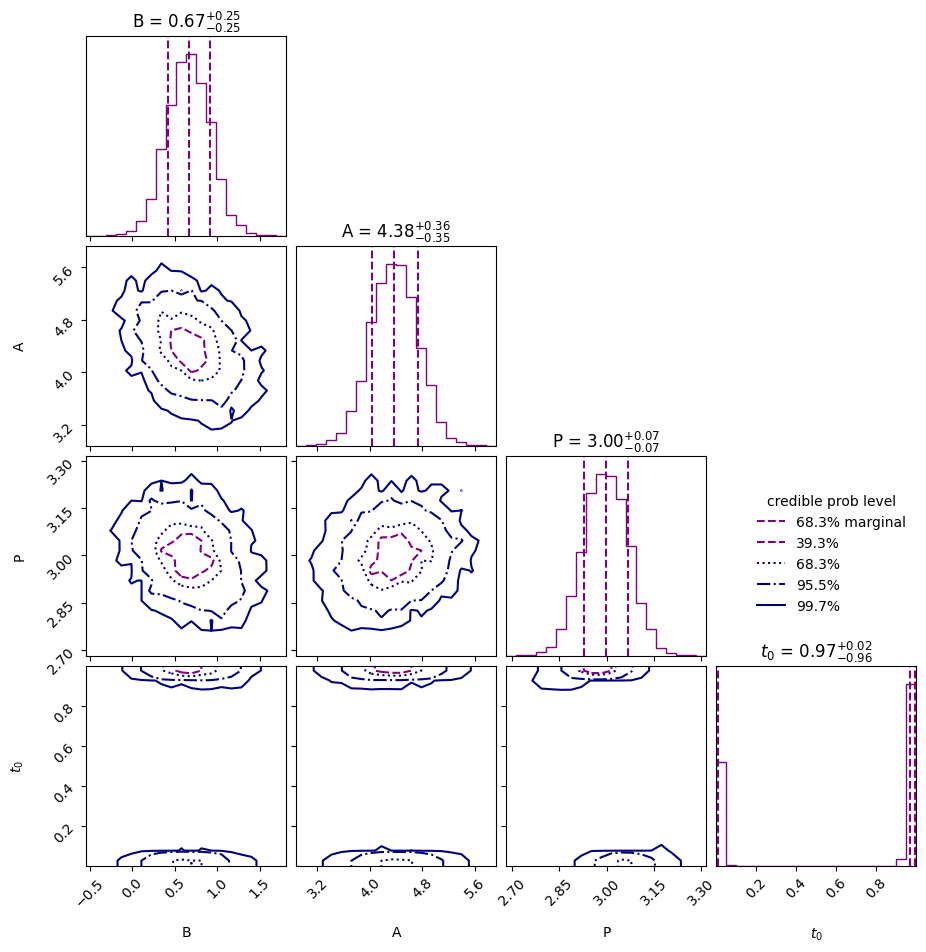

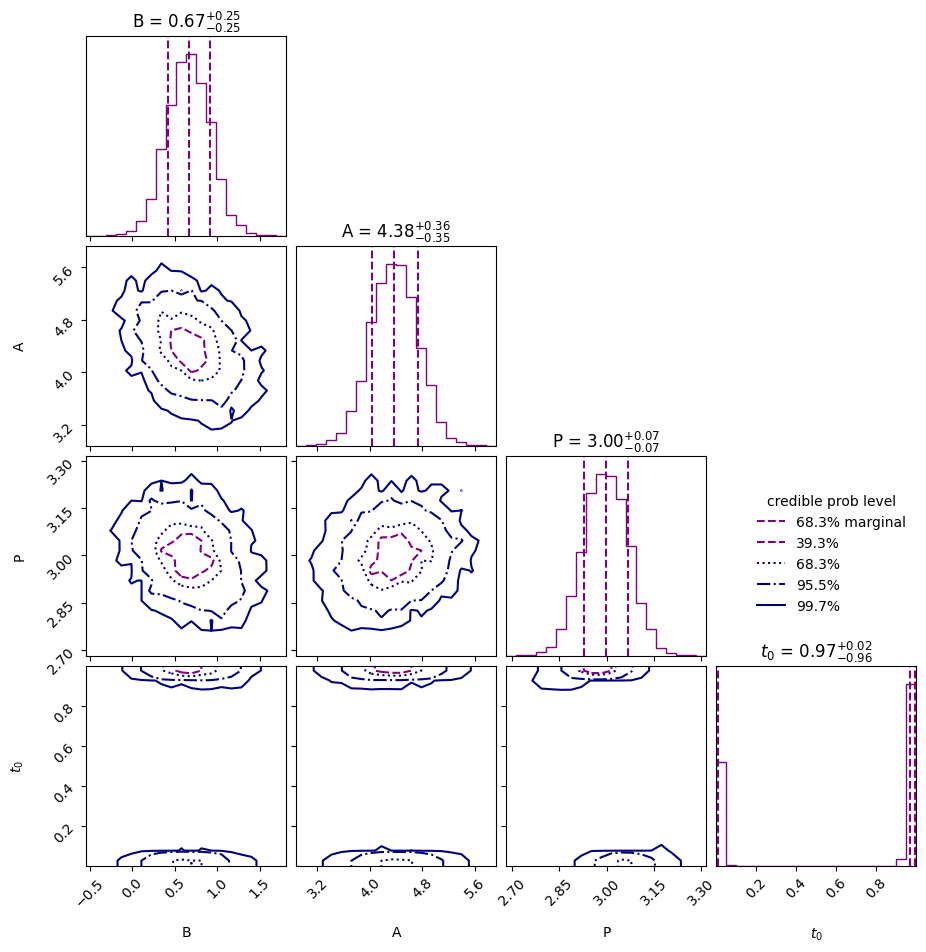

In [ ]:
#Look at the corner plot. How one thing relates to another.
from ultranest.plot import cornerplot
cornerplot(result)

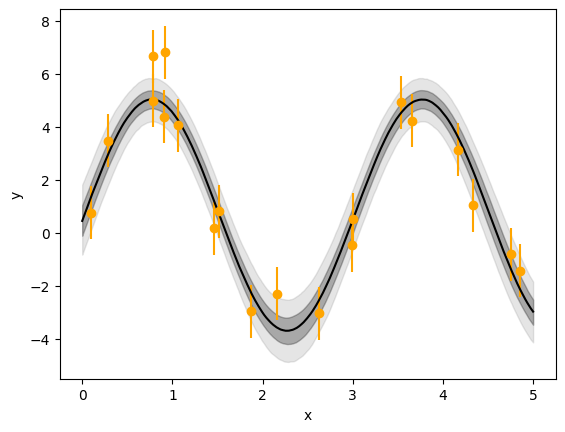

In [ ]:
#Plot the fitted model we have just derived, we want to visually validate the model

plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.errorbar(x=t, y=y, yerr=yerr, marker='o', ls=' ', color='orange')

t_grid = np.linspace(0, 5, 400)

from ultranest.plot import PredictionBand
band = PredictionBand(t_grid)

for B, A, P, t0 in sampler.results['samples']:
    band.add(sine_model(t_grid, A=A, B=B, P=P, t0=t0))

band.line(color='k')
band.shade(color='k', alpha=0.3)
band.shade(q=0.49, color='gray', alpha=0.2)


DEBUG:ultranest:Making trace plot ... 


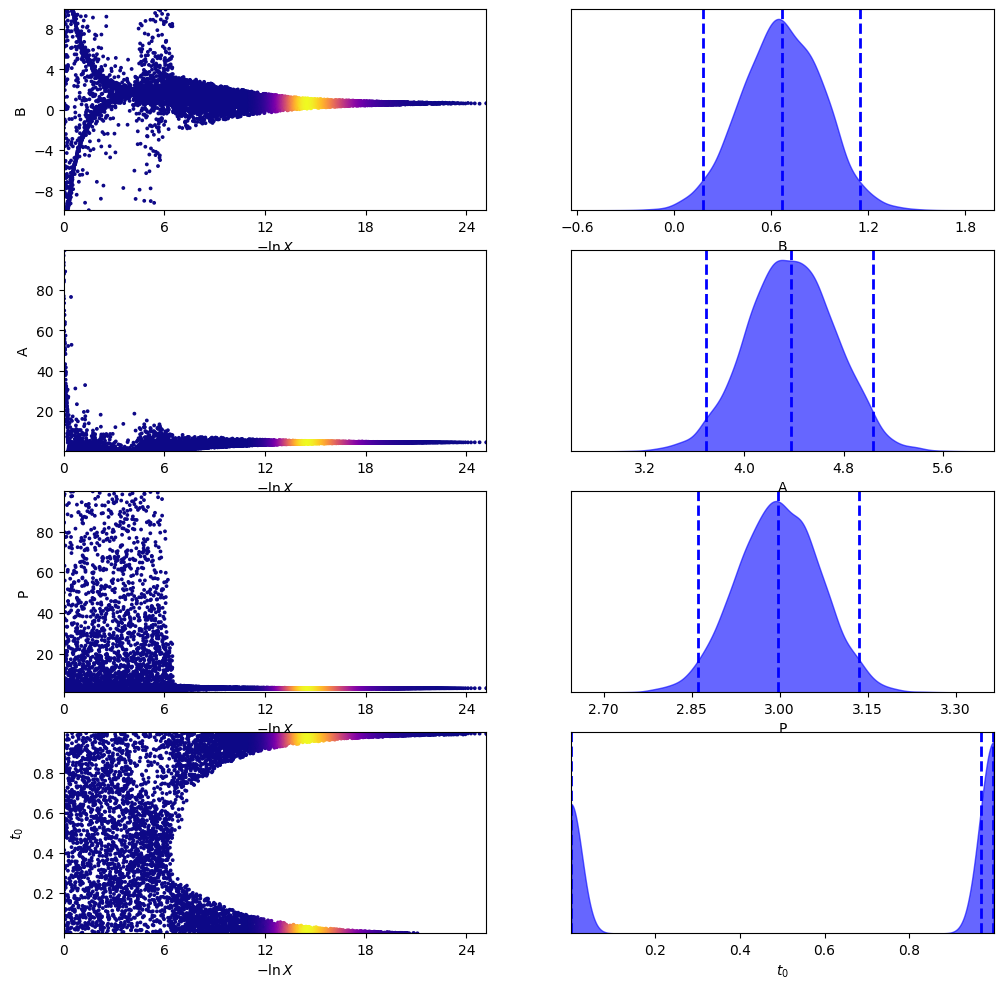

In [ ]:
#plot the trace to show some more information
sampler.plot_trace()